# **SCI: Inteligencia artificial - Proyecto 1**
## **Análisis de Películas y Series de TV en IMDB**

### **Introducción**

El propósito de este proyecto es realizar un análisis detallado de datos y un modelado matemático para comprender mejor las relaciones entre diversas características de películas y series de televisión. Específicamente, nos enfocaremos en variables como la calificación en IMDB, la recaudación bruta y el número de votos. Este proyecto permitirá a los estudiantes aplicar y fortalecer sus conocimientos en álgebra lineal, cálculo y análisis de datos, utilizando herramientas como Numpy, pandas y matplotlib.

1. **Análisis exploratorio (EDA)**: Exploraremos tendencias, distribuciones y relaciones entre variables. Algunas preguntas interesantes podrían ser:
   - ¿Qué directores tienden a generar mayores ingresos en taquilla?
   - ¿Qué actores están asociados con películas que generan mayores ingresos?
   - ¿Qué directores tienden a recibir más votos en IMDb?
   - ¿Qué actores están asociados con películas que reciben más votos?
   - ¿Qué géneros de películas son los preferidos por los actores?
   - ¿Qué combinación de actores (Star1, Star2, Star3 y Star4) está obteniendo buenas calificaciones en IMDb la mayor parte del tiempo?
   - ¿Qué combinación de actores (Star1, Star2, Star3 y Star4) está obteniendo buenos ingresos en taquilla?

2. **Carga y limpieza de datos**: Utilizaremos la librería pandas para cargar el dataset y realizar la limpieza básica de datos (manejo de valores nulos, tipo de datos).


3. **Visualización de datos**: Utilizaremos gráficos y visualizaciones utilizando la librería matplotlib.

Importar las librerias necesarias

In [ ]:
# Librerias necesarias par el analisis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **1. Analisis exploratorio de datos (EDA)**

### **Inspeccion de Datos**

Para comenzar con nuestro análisis, primero necesitamos importar el dataset. Utilizamos la librería pandas para esta tarea, que nos permite manejar datos de manera eficiente. A continuación, mostramos cómo se realiza la carga del dataset y su visualización:


In [ ]:

data=pd.read_csv('imdb_top_1000.csv')

data.head(5)


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


### **Verificación del Tipo de Datos y Datos Faltantes**

Una vez cargado el dataset, es importante verificar el tipo de datos de cada columna y detectar si existen datos faltantes. Esto nos ayudará a identificar posibles problemas en los datos y determinar las acciones necesarias para la limpieza del dataset.
Utilizamos el método `info()` de pandas para obtener esta información:*texto en cursiva*

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


### **Verificación de las Dimensiones del Dataset**

Es fundamental conocer las dimensiones de nuestro dataset para tener una idea del tamaño del mismo y la cantidad de datos con los que estamos trabajando. Utilizamos el atributo `shape` del DataFrame para obtener esta información.


In [ ]:
#Ver dimensiones del dataset
data.shape

(1000, 16)

### **Detección de Valores Faltantes**

Detectar valores faltantes en nuestro dataset es un paso crucial en la fase de limpieza de datos. Los valores faltantes pueden afectar negativamente el análisis y los resultados de los modelos predictivos, por lo que es importante identificarlos y tratarlos adecuadamente.

Utilizamos los métodos `isnull()` y `sum()` de pandas para realizar esta tarea:



In [ ]:
#Detectar valores faltantes
missing_values = data.isnull().sum()
missing_values

,0
Poster_Link,0
Series_Title,0
Released_Year,0
Certificate,101
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,157
Director,0


## **2. Limpieza de datos**
La limpieza de datos es un paso crucial en el proceso de análisis, ya que asegura que los datos sean precisos, completos y estén en un formato adecuado para el análisis. En esta sección, describimos los procedimientos realizados para limpiar y preparar el dataset para el análisis.

# **Detección de Valores Faltantes**
Para identificar los valores faltantes en nuestro dataset, utilizamos el siguiente código:

In [ ]:
#Detectar valores faltantes
missing_values = data.isnull().sum()
missing_values

,0
Poster_Link,0
Series_Title,0
Released_Year,0
Certificate,101
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,157
Director,0


In [ ]:
#Filtrar los valores faltantes que sean mayores a 0
missing_values[missing_values>0]

,0
Certificate,101
Meta_score,157
Gross,169


### **Reporte de Valores Faltantes**

Para visualizar la distribución de valores faltantes en cada columna, generamos un gráfico de barras utilizando el siguiente código:

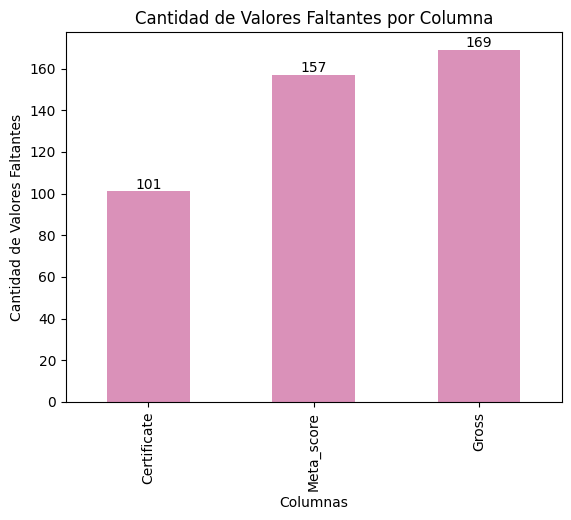

In [ ]:
#Reporte de los valores faltantes
axs = missing_values[missing_values>0].plot(kind='bar', color='#CB629C', alpha=0.7)

plt.title('Cantidad de Valores Faltantes por Columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Valores Faltantes')
plt.bar_label(axs.containers[0])
plt.show()

### **Análisis de los Valores Faltantes**

Para un análisis más detallado de los valores faltantes, se genera el siguiente gráfico que incluye líneas de referencia para el 20% y el 60% de los datos del dataset:

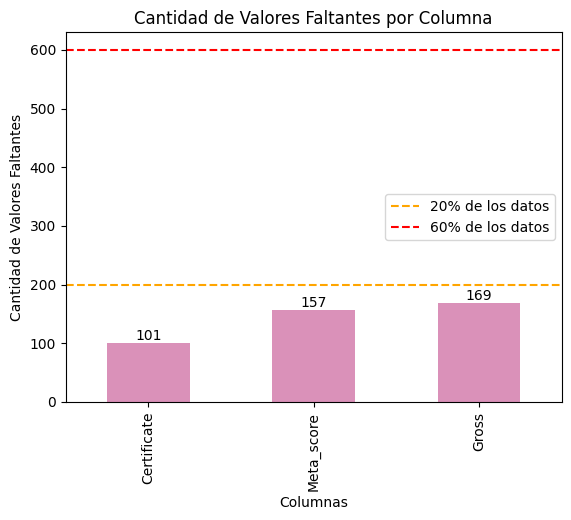

In [ ]:
#Analisis de los Valores Faltantes
axs = missing_values[missing_values>0].plot(kind='bar', color='#CB629C', alpha=0.7)
plt.axhline(len(data)*0.2, color='orange', linestyle='--', label= '20% de los datos')
plt.axhline(len(data)*0.6, color='red', linestyle='--', label= '60% de los datos')
plt.title('Cantidad de Valores Faltantes por Columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Valores Faltantes')
plt.legend()
plt.bar_label(axs.containers[0])
plt.show()

### **Relleno de Valores Faltantes**

Para manejar los valores faltantes en la columna `Certificate`, se ha optado por rellenar los valores nulos con la moda de la columna ya que es una variable categorica.

A continuación se detalla el proceso:

In [ ]:
#Almacenamos la moda en una variable
mode_certificate = data['Certificate'].mode()[0]
#Rellenamos los nan con la moda
data['Certificate'].fillna(mode_certificate, inplace=True)
#Comprobamos si ya no tenemos nans
data['Certificate'].isnull().sum()

0

### **Relleno de Valores Faltantes con la Mediana**

En la columna `Gross`, se ha optado por utilizar la mediana para rellenar los valores faltantes, debido a la presencia de varios outliers en los datos. A continuación se detalla el proceso:

In [ ]:
# Como vemos que tenemos varios outliners con el grafico de BoxPlot usaremos la mediana para rellenar los datos faltantes
data['Gross'].fillna(data['Gross'].median(), inplace=True)
# comprobamos que ya no tengan valores faltantes
data['Gross'].isnull().sum()

0

### **Relleno de Valores Faltantes con la Mediana**

Para la columna `Meta_score`, hemos decidido rellenar los valores faltantes utilizando la mediana debido a la asimetría observada en la distribución de los datos. A continuación se muestra el proceso realizado

In [ ]:
# Reemplazaremos los valores faltantes con la media por que presenta una asimetria
data['Meta_score'].fillna(data['Meta_score'].median(), inplace=True)

#C Comprobamos el cambio
data['Meta_score'].isnull().sum()

0

# **Convertiremos los datos de tipo objeto a numerico**

### **Limpieza de la Columna 'Runtime'**

La columna `Runtime` contiene la duración de las películas y series, pero los valores incluyen la cadena "min" y pueden tener espacios en blanco. Para utilizar estos datos de manera efectiva, necesitamos limpiar la columna eliminando las cadenas de texto innecesarias y convirtiendo los valores a un tipo de dato numérico.

A continuación, mostramos el proceso de limpieza:


In [ ]:
# Mostrar el tipo de dato y las primeras 5 variables únicas antes de limpieza de 'Runtime'
print('# Antes de la limpieza de Runtime')
print('Tipo de dato: ', data['Runtime'].dtype)
print('5 primeras Variables: ', data['Runtime'].unique()[:5])
print("\n" + "*"*60 + "\n")

# Eliminar la cadena "min" de la columna 'Runtime'
data["Runtime"] = data["Runtime"].str.replace("min", "")

# Eliminar los espacios en blanco al inicio y al final de los valores de la columna 'Runtime'
data["Runtime"] = data["Runtime"].str.strip()

# Convertir los valores de la columna 'Runtime' a enteros
data["Runtime"] = data["Runtime"].astype(int)

# Mostrar el tipo de dato y las primeras 5 variables únicas después de limpieza de 'Runtime'
print('# Después de la limpieza de Runtime')
print('Tipo de dato: ', data['Runtime'].dtype)
print('5 primeras Variables: ', data['Runtime'].unique()[:5])
print("\n" + "*"*60 + "\n")

# Antes de la limpieza de Runtime
Tipo de dato:  object
5 primeras Variables:  ['142 min' '175 min' '152 min' '202 min' '96 min']

************************************************************

# Después de la limpieza de Runtime
Tipo de dato:  int64
5 primeras Variables:  [142 175 152 202  96]

************************************************************



In [ ]:
# Mostrar el tipo de dato y las primeras 5 variables únicas antes de limpieza de 'Released_Year'
print('# Antes de la limpieza de Released_Year')
print('Tipo de dato: ', data['Released_Year'].dtype)
print('5 primeras Variables: ', data['Released_Year'].unique()[:5])
print("\n" + "*"*60 + "\n")

# Reemplazar el valor "PG" con NaN en la columna 'Released_Year'
data["Released_Year"] = data["Released_Year"].replace("PG", np.nan)

# Convertir la columna 'Released_Year' a tipo float para manejar valores nulos
# El tratamiento de los valores nulos se realizará más adelante en el script
data["Released_Year"] = data["Released_Year"].astype(float)

# Mostrar el tipo de dato y las primeras 5 variables únicas después de limpieza de 'Released_Year'
print('# Después de la limpieza de Released_Year')
print('Tipo de dato: ', data['Released_Year'].dtype)
print('5 primeras Variables: ', data['Released_Year'].unique()[:5])
print("\n" + "*"*60 + "\n")

# Antes de la limpieza de Released_Year
Tipo de dato:  object
5 primeras Variables:  ['1994' '1972' '2008' '1974' '1957']

************************************************************

# Después de la limpieza de Released_Year
Tipo de dato:  float64
5 primeras Variables:  [1994. 1972. 2008. 1974. 1957.]

************************************************************



In [ ]:
# Mostrar el tipo de dato y las primeras 5 variables únicas antes de limpieza de 'Gross'
print('# Antes de la limpieza de Gross')
print('Tipo de dato: ', data['Gross'].dtype)
print('5 primeras Variables: ', data['Gross'].unique()[:5])
print("\n" + "*"*60 + "\n")

# Eliminar las comas de la columna 'Gross' y convertir los valores a tipo float
data["Gross"] = data["Gross"].str.replace(",", "").astype(float)

# Mostrar el tipo de dato y las primeras 5 variables únicas después de limpieza de 'Gross'
print('# Después de la limpieza de Gross')
print('Tipo de dato: ', data['Gross'].dtype)
print('5 primeras Variables: ', data['Gross'].unique()[:5])
print("\n" + "*"*60 + "\n")

# Antes de la limpieza de Gross
Tipo de dato:  float64
5 primeras Variables:  [2.83414690e+07 1.34966411e+08 5.34858444e+08 5.73000000e+07
 4.36000000e+06]

************************************************************



AttributeError: Can only use .str accessor with string values!

### **Estadísticas Descriptivas del Dataset**

Después de realizar las limpiezas necesarias en el dataset, es importante revisar las estadísticas descriptivas de las columnas numéricas para entender mejor la distribución de los datos y detectar posibles anomalías o patrones.

A continuación, utilizamos el método `describe()` para obtener un resumen estadístico de las columnas numéricas del dataset:

In [ ]:
#Vemos como quedo la nueva tabla
data.describe()

,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03
mean,122.891000,7.949300,78.133000,2.736929e+05,6.051360e+07
std,28.093671,0.275491,11.368225,3.273727e+05,1.014192e+08
min,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,103.000000,7.700000,72.000000,5.552625e+04,5.012919e+06
50%,119.000000,7.900000,79.000000,1.385485e+05,2.353089e+07
75%,137.000000,8.100000,85.250000,3.741612e+05,6.153989e+07
max,321.000000,9.300000,100.000000,2.343110e+06,9.366622e+08


### **Análisis de Columnas Numéricas**

Para entender mejor la distribución y las características de las columnas numéricas en nuestro dataset, hemos definido una función llamada `analyze_column`. Esta función verifica si la columna es de tipo numérico y no está completamente vacía, y luego realiza un análisis detallado.

A continuación, se muestra el código de la función y una explicación de cada parte:

In [ ]:
def analyze_column(column,binsN):
    # Verificar si la columna es de tipo numérico (float64 o int64) y no está completamente vacía
    if (column.dtype == np.float64 or column.dtype == np.int64) and column.isnull().sum() != len(column):
        plt.figure(figsize=(15, 5))
        plt.suptitle(column.name)

        # Histograma y media
        plt.subplot(1, 2, 1)
        plt.title(f'Histograma de {column.name}')
        plt.xlabel('Valores')
        plt.ylabel('Frecuencia')
        plt.hist(column.dropna(), bins=binsN, alpha=0.6, color='b',edgecolor='black',)
        mean_value = column.mean()
        plt.axvline(mean_value, color="red", label='Mediana')
        plt.legend()

        # Diagrama de caja
        plt.subplot(1, 2, 2)
        plt.title(f'Botplox de {column.name}')
        plt.xlabel('Valores')
        plt.boxplot(column.dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))

        plt.show()

        # Estadísticas descriptivas
        print(f"Asimetría: {column.skew()}")
        print(f"Curtosis: {column.kurt()}")
        print(f"Media: {mean_value}")
        print(f"Mediana: {column.median()}")
        print(f"Desviación estándar: {column.std()}")


### **Análisis de la Columna 'Released_Year'**

Utilizaremos la función `analyze_column` para realizar un análisis detallado de la columna `Released_Year`. Esta columna representa el año de lanzamiento de las películas y series en nuestro dataset. Al analizar esta columna, podremos obtener una mejor comprensión de su distribución y características estadísticas.

In [ ]:
analyze_column(data["Released_Year"],50)

### **Análisis de la Columna 'Runtime'**

Vamos a utilizar la función `analyze_column` para realizar un análisis detallado de la columna `Runtime`. Esta columna representa la duración de las películas y series en minutos. Analizar esta columna nos permitirá entender mejor la distribución y características de las duraciones en nuestro dataset.


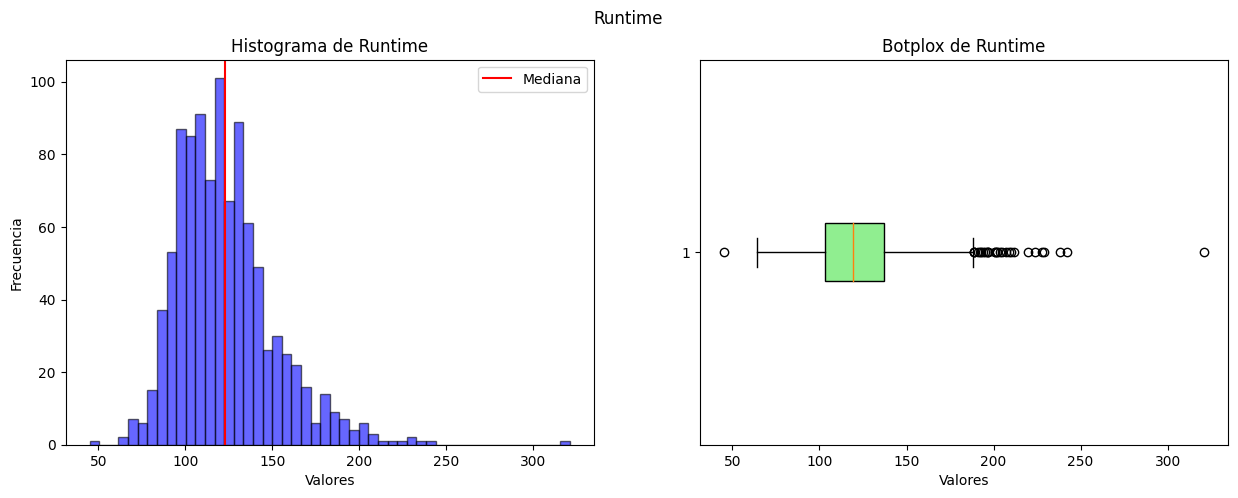

Asimetría: 1.2079088917390541
Curtosis: 3.4262648520304624
Media: 122.891
Mediana: 119.0
Desviación estándar: 28.09367141142954


In [ ]:
analyze_column(data["Runtime"],50)

### **Análisis de la Columna 'IMDB_Rating'**

En nuestro proyecto, la columna `IMDB_Rating` representa la calificación que las películas y series han recibido en IMDB. Esta columna es nuestra **variable dependiente**, ya que nuestro objetivo es entender cómo diferentes características del dataset afectan esta calificación. Analizar esta columna nos permitirá identificar patrones y relaciones importantes que pueden influir en la calificación en IMDB.


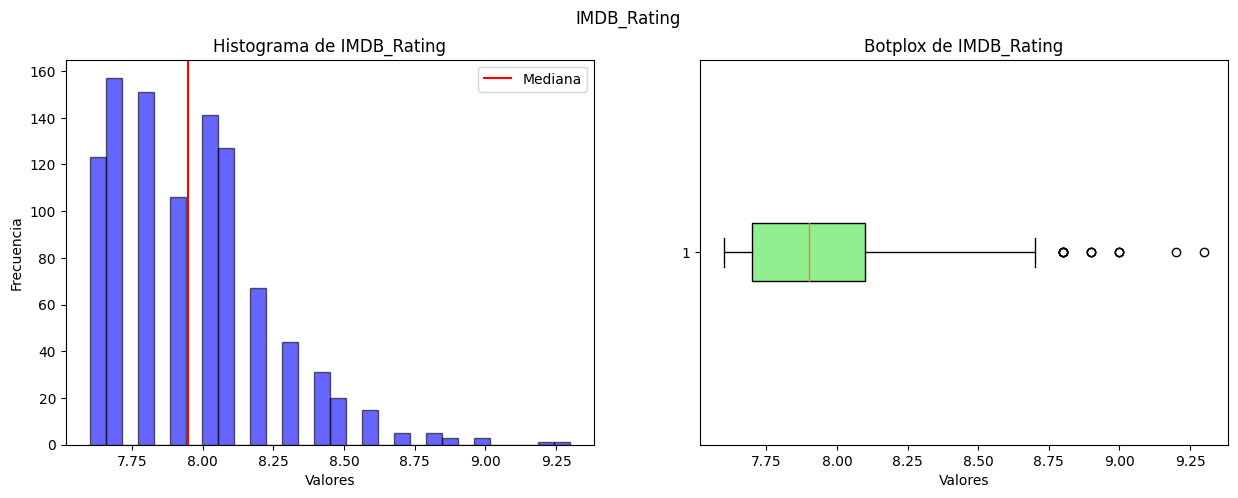

Asimetría: 1.016964453611272
Curtosis: 1.4327269987500322
Media: 7.949299999999999
Mediana: 7.9
Desviación estándar: 0.2754912074920095


In [ ]:
analyze_column(data["IMDB_Rating"],30)

### **Análisis de la Columna 'Meta_score'**

En nuestro proyecto, la columna `Meta_score` representa la puntuación en Metacritic que las películas y series han recibido. Esta columna es una variable importante para nuestro análisis, ya que puede proporcionar información complementaria sobre la recepción crítica de los contenidos analizados. Al analizar esta columna, podremos entender mejor cómo se distribuyen estas puntuaciones y su relación con otras variables del dataset.


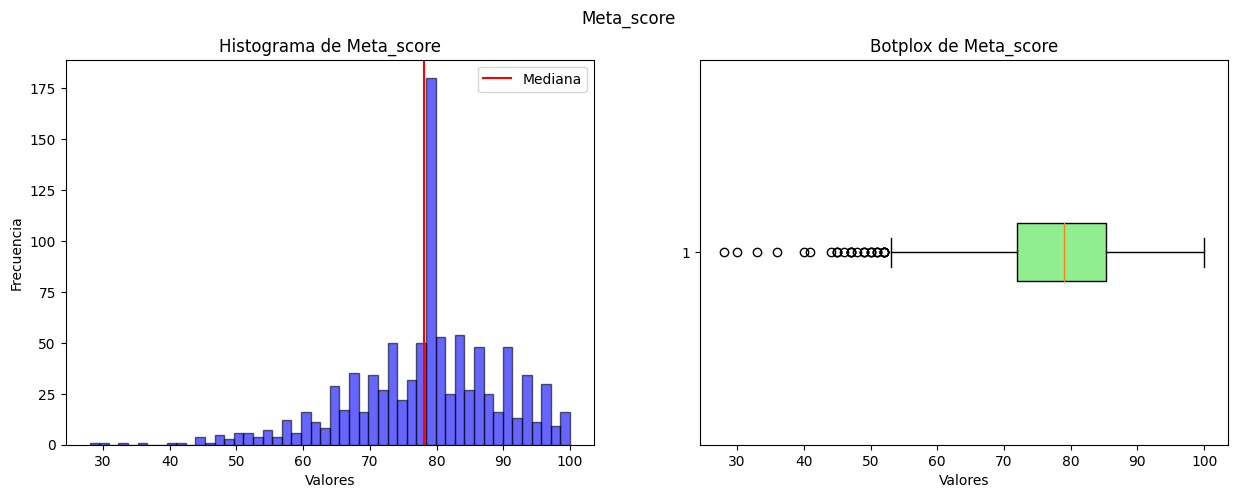

Asimetría: -0.7005046986722882
Curtosis: 1.0877479821263631
Media: 78.133
Mediana: 79.0
Desviación estándar: 11.368225347324337


In [ ]:
analyze_column(data["Meta_score"],50)

### **Análisis de la Columna 'No_of_Votes'**

En nuestro proyecto, la columna `No_of_Votes` representa el número total de votos que las películas y series han recibido en IMDB. Esta columna es relevante para entender la popularidad y el nivel de participación del público en la evaluación de los contenidos. Analizar esta columna nos permitirá examinar cómo se distribuyen los votos y detectar patrones en la popularidad de las películas y series.

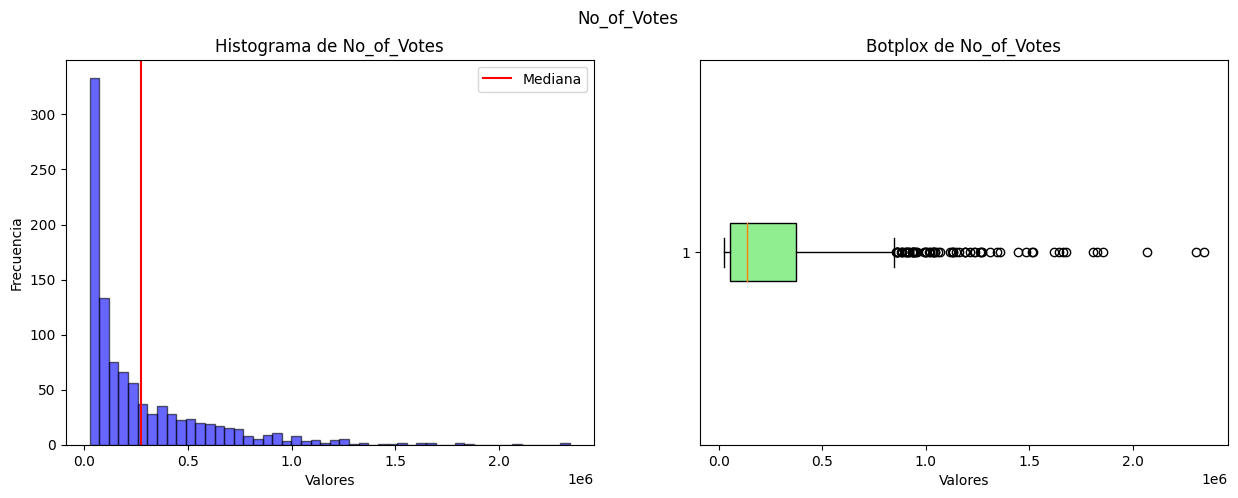

Asimetría: 2.30001058546554
Curtosis: 6.89509932739565
Media: 273692.911
Mediana: 138548.5
Desviación estándar: 327372.7039341249


In [ ]:
analyze_column(data["No_of_Votes"],50)

### **Análisis de la Columna 'Gross'**

En nuestro proyecto, la columna `Gross` representa la recaudación bruta en taquilla de las películas. Analizar esta columna es crucial para entender cómo la taquilla de las películas varía y qué patrones pueden existir en los ingresos de taquilla. Esto puede ayudarnos a correlacionar la recaudación con otras variables como calificaciones, número de votos, o el género de la película.

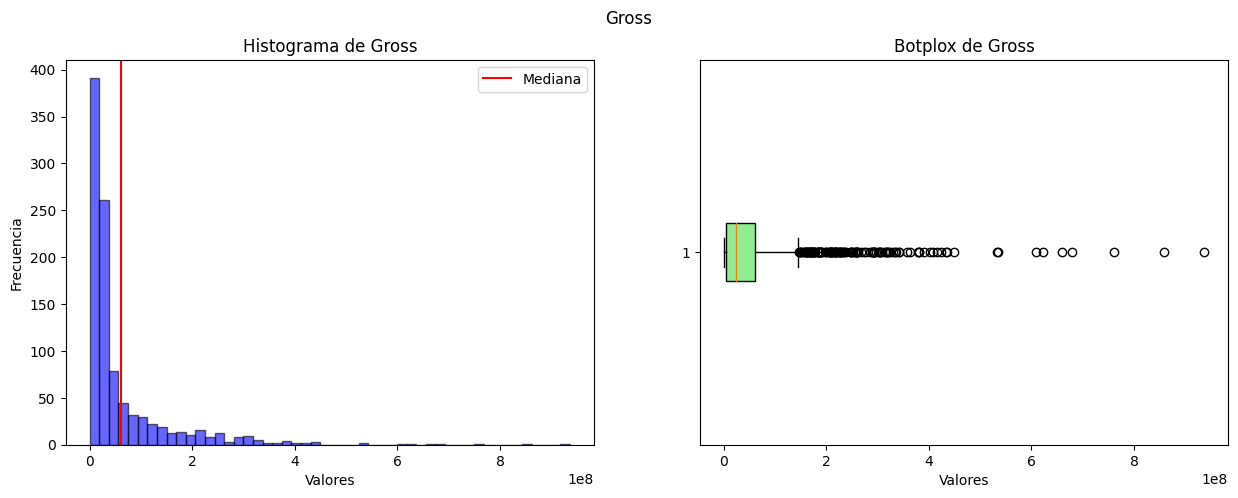

Asimetría: 3.5032285981893563
Curtosis: 17.267468511428092
Media: 60513598.724
Mediana: 23530892.0
Desviación estándar: 101419170.55617765


In [ ]:
analyze_column(data["Gross"],50)

### **Pregunta 1**
### **Análisis de la Recaudación Bruta por Director**

En esta sección, abordaremos el siguiente problema:

**1. ¿Qué directores tienden a generar mayores ingresos en taquilla?**

Para responder a esta pregunta, realizamos un análisis que incluye dos partes principales:
1. **Análisis de la Recaudación Bruta por Director**
2. **Análisis de los Géneros Cinematográficos Más Lucrativos para los Principales Directores**


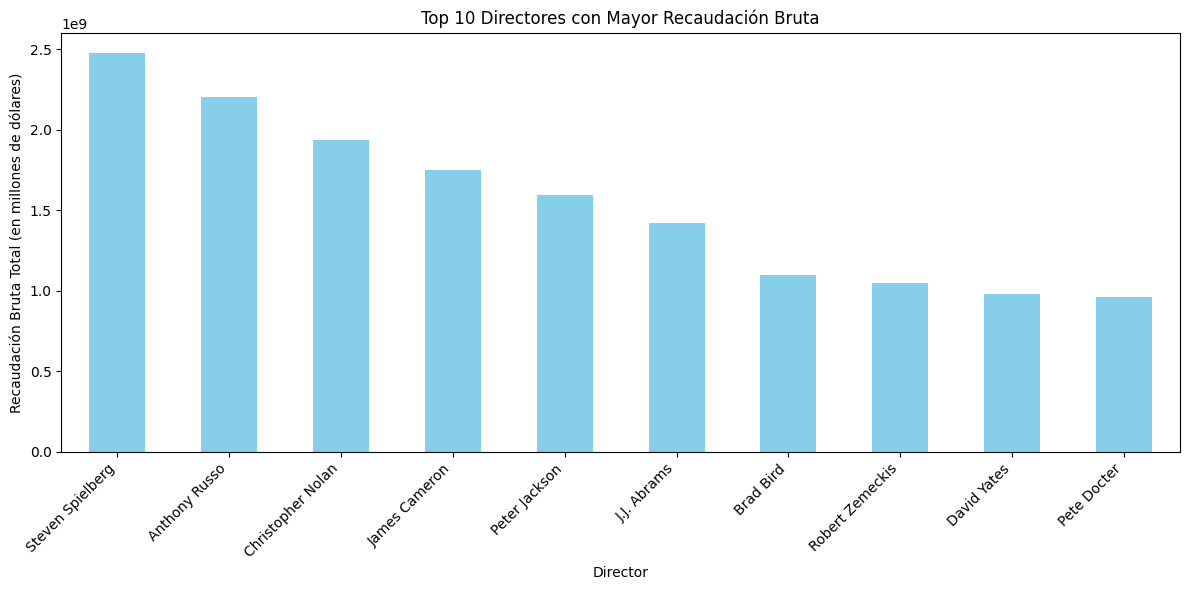

In [ ]:
# Agrupar por director y sumar la recaudación bruta
director_gross = data.groupby('Director')['Gross'].sum().sort_values(ascending=False)

# Seleccionar los 10 directores con mayor recaudación
top_10_directors = director_gross.head(10)

# Graficar los resultados
plt.figure(figsize=(12, 6))
top_10_directors.plot(kind='bar', color='skyblue')
plt.title('Top 10 Directores con Mayor Recaudación Bruta')
plt.xlabel('Director')
plt.ylabel('Recaudación Bruta Total (en millones de dólares)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

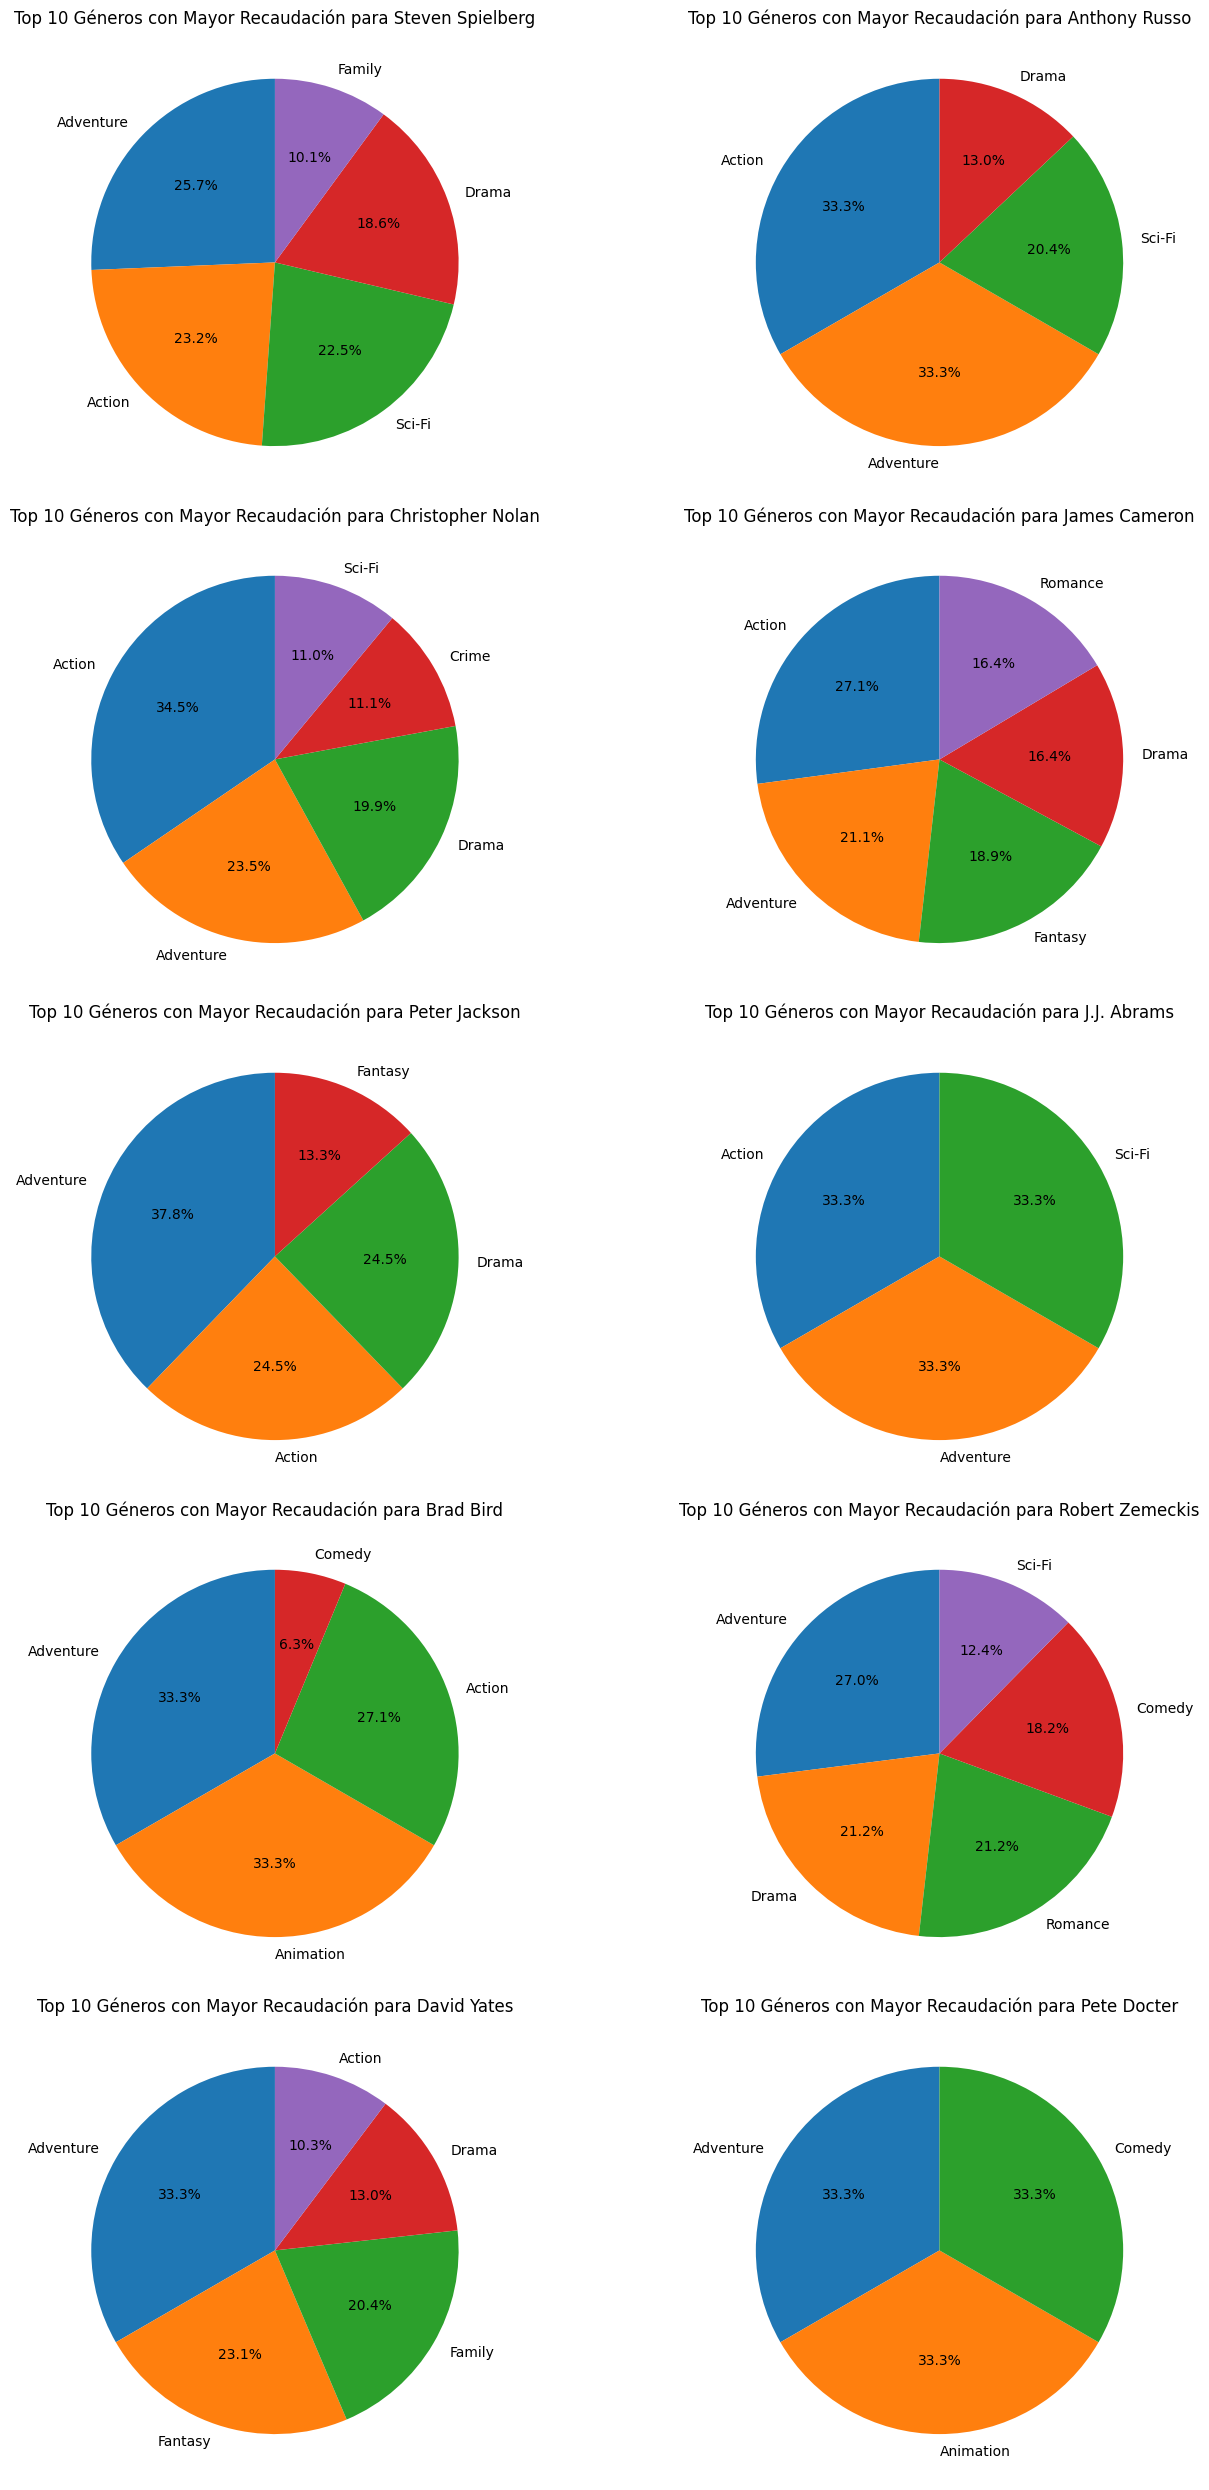

In [ ]:
# Crear subplots para los gráficos circulares
fig, axes = plt.subplots(5, 2, figsize=(15, 25))
axes = axes.flatten()
for i, director in enumerate(top_10_directors.index):
    # Filtrar el DataFrame para incluir solo películas dirigidas por el director actual
    director_data = data[data['Director'] == director]

    # Separar los géneros en una lista para cada película
    director_data.loc[:, 'Genre'] = director_data['Genre'].str.split(', ')

    # Explotar la columna de géneros para tener una fila por género
    director_genres = director_data.explode('Genre')

    # Agrupar por género y sumar la recaudación bruta
    genre_gross = director_genres.groupby('Genre')['Gross'].sum().sort_values(ascending=False)

    # Seleccionar los 10 géneros principales
    top_5_genres = genre_gross.head(5)

    # Crear el gráfico circular
    axes[i].pie(top_5_genres, labels=top_5_genres.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Top 10 Géneros con Mayor Recaudación para {director}')

plt.tight_layout()
plt.show()

### **Pregunta 2**
### **Análisis de la Recaudación Bruta por Actores**

En esta sección, abordaremos el siguiente problema:

**2. ¿Qué actores están asociados con películas que generan mayores ingresos?**

Para responder a esta pregunta, realizamos un análisis que incluye dos partes principales:

1. **Análisis de la Recaudación Bruta por Actores**

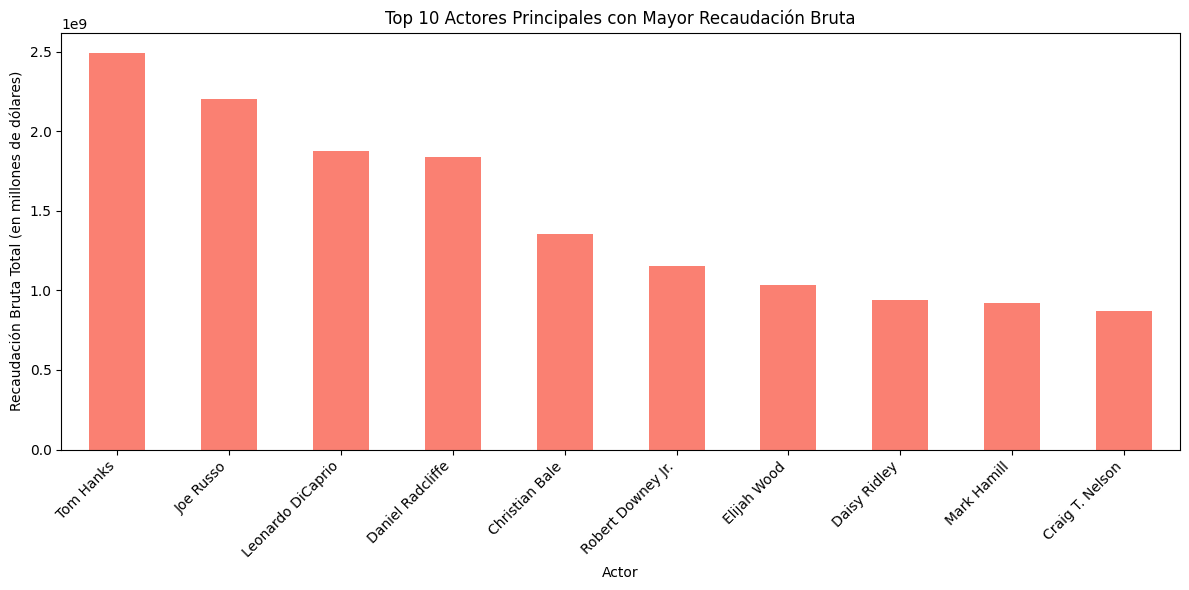

In [ ]:
# Agrupar por actor principal y sumar la recaudación bruta
actor_gross = data.groupby('Star1')['Gross'].sum().sort_values(ascending=False)

# Seleccionar los 10 actores con mayor recaudación
top_10_actors = actor_gross.head(10)

# Graficar los resultados
plt.figure(figsize=(12, 6))
top_10_actors.plot(kind='bar', color='salmon')
plt.title('Top 10 Actores Principales con Mayor Recaudación Bruta')
plt.xlabel('Actor')
plt.ylabel('Recaudación Bruta Total (en millones de dólares)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **Pregunta 3**
### **Análisis del Número de Votos por Director**

En esta sección, abordaremos el siguiente problema:

**3. ¿Qué directores tienden a recibir más votos en IMDB?**

Para responder a esta pregunta, realizamos el análisis en dos partes:

1. **Análisis del Número de Votos por Director**


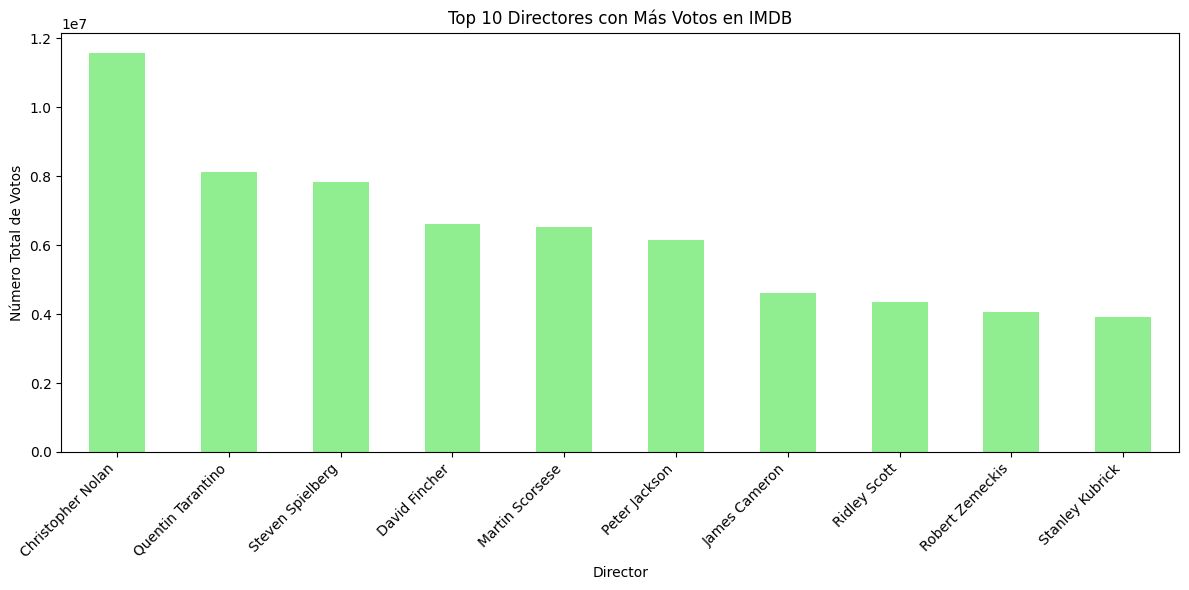

In [ ]:
# Agrupar por director y sumar los votos
director_votes = data.groupby('Director')['No_of_Votes'].sum().sort_values(ascending=False)

# Seleccionar los 10 directores con más votos
top_10_directors_votes = director_votes.head(10)

# Graficar los resultados
plt.figure(figsize=(12, 6))
top_10_directors_votes.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Directores con Más Votos en IMDB')
plt.xlabel('Director')
plt.ylabel('Número Total de Votos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

2. **Análisis de los Géneros Cinematográficos para los Directores con Mayor Número de Votos, Delimitado por la Mediana**

  **Adicional:** Se hacen gráficos que detallan los géneros y lo delimita con "---" a través de la mediana.

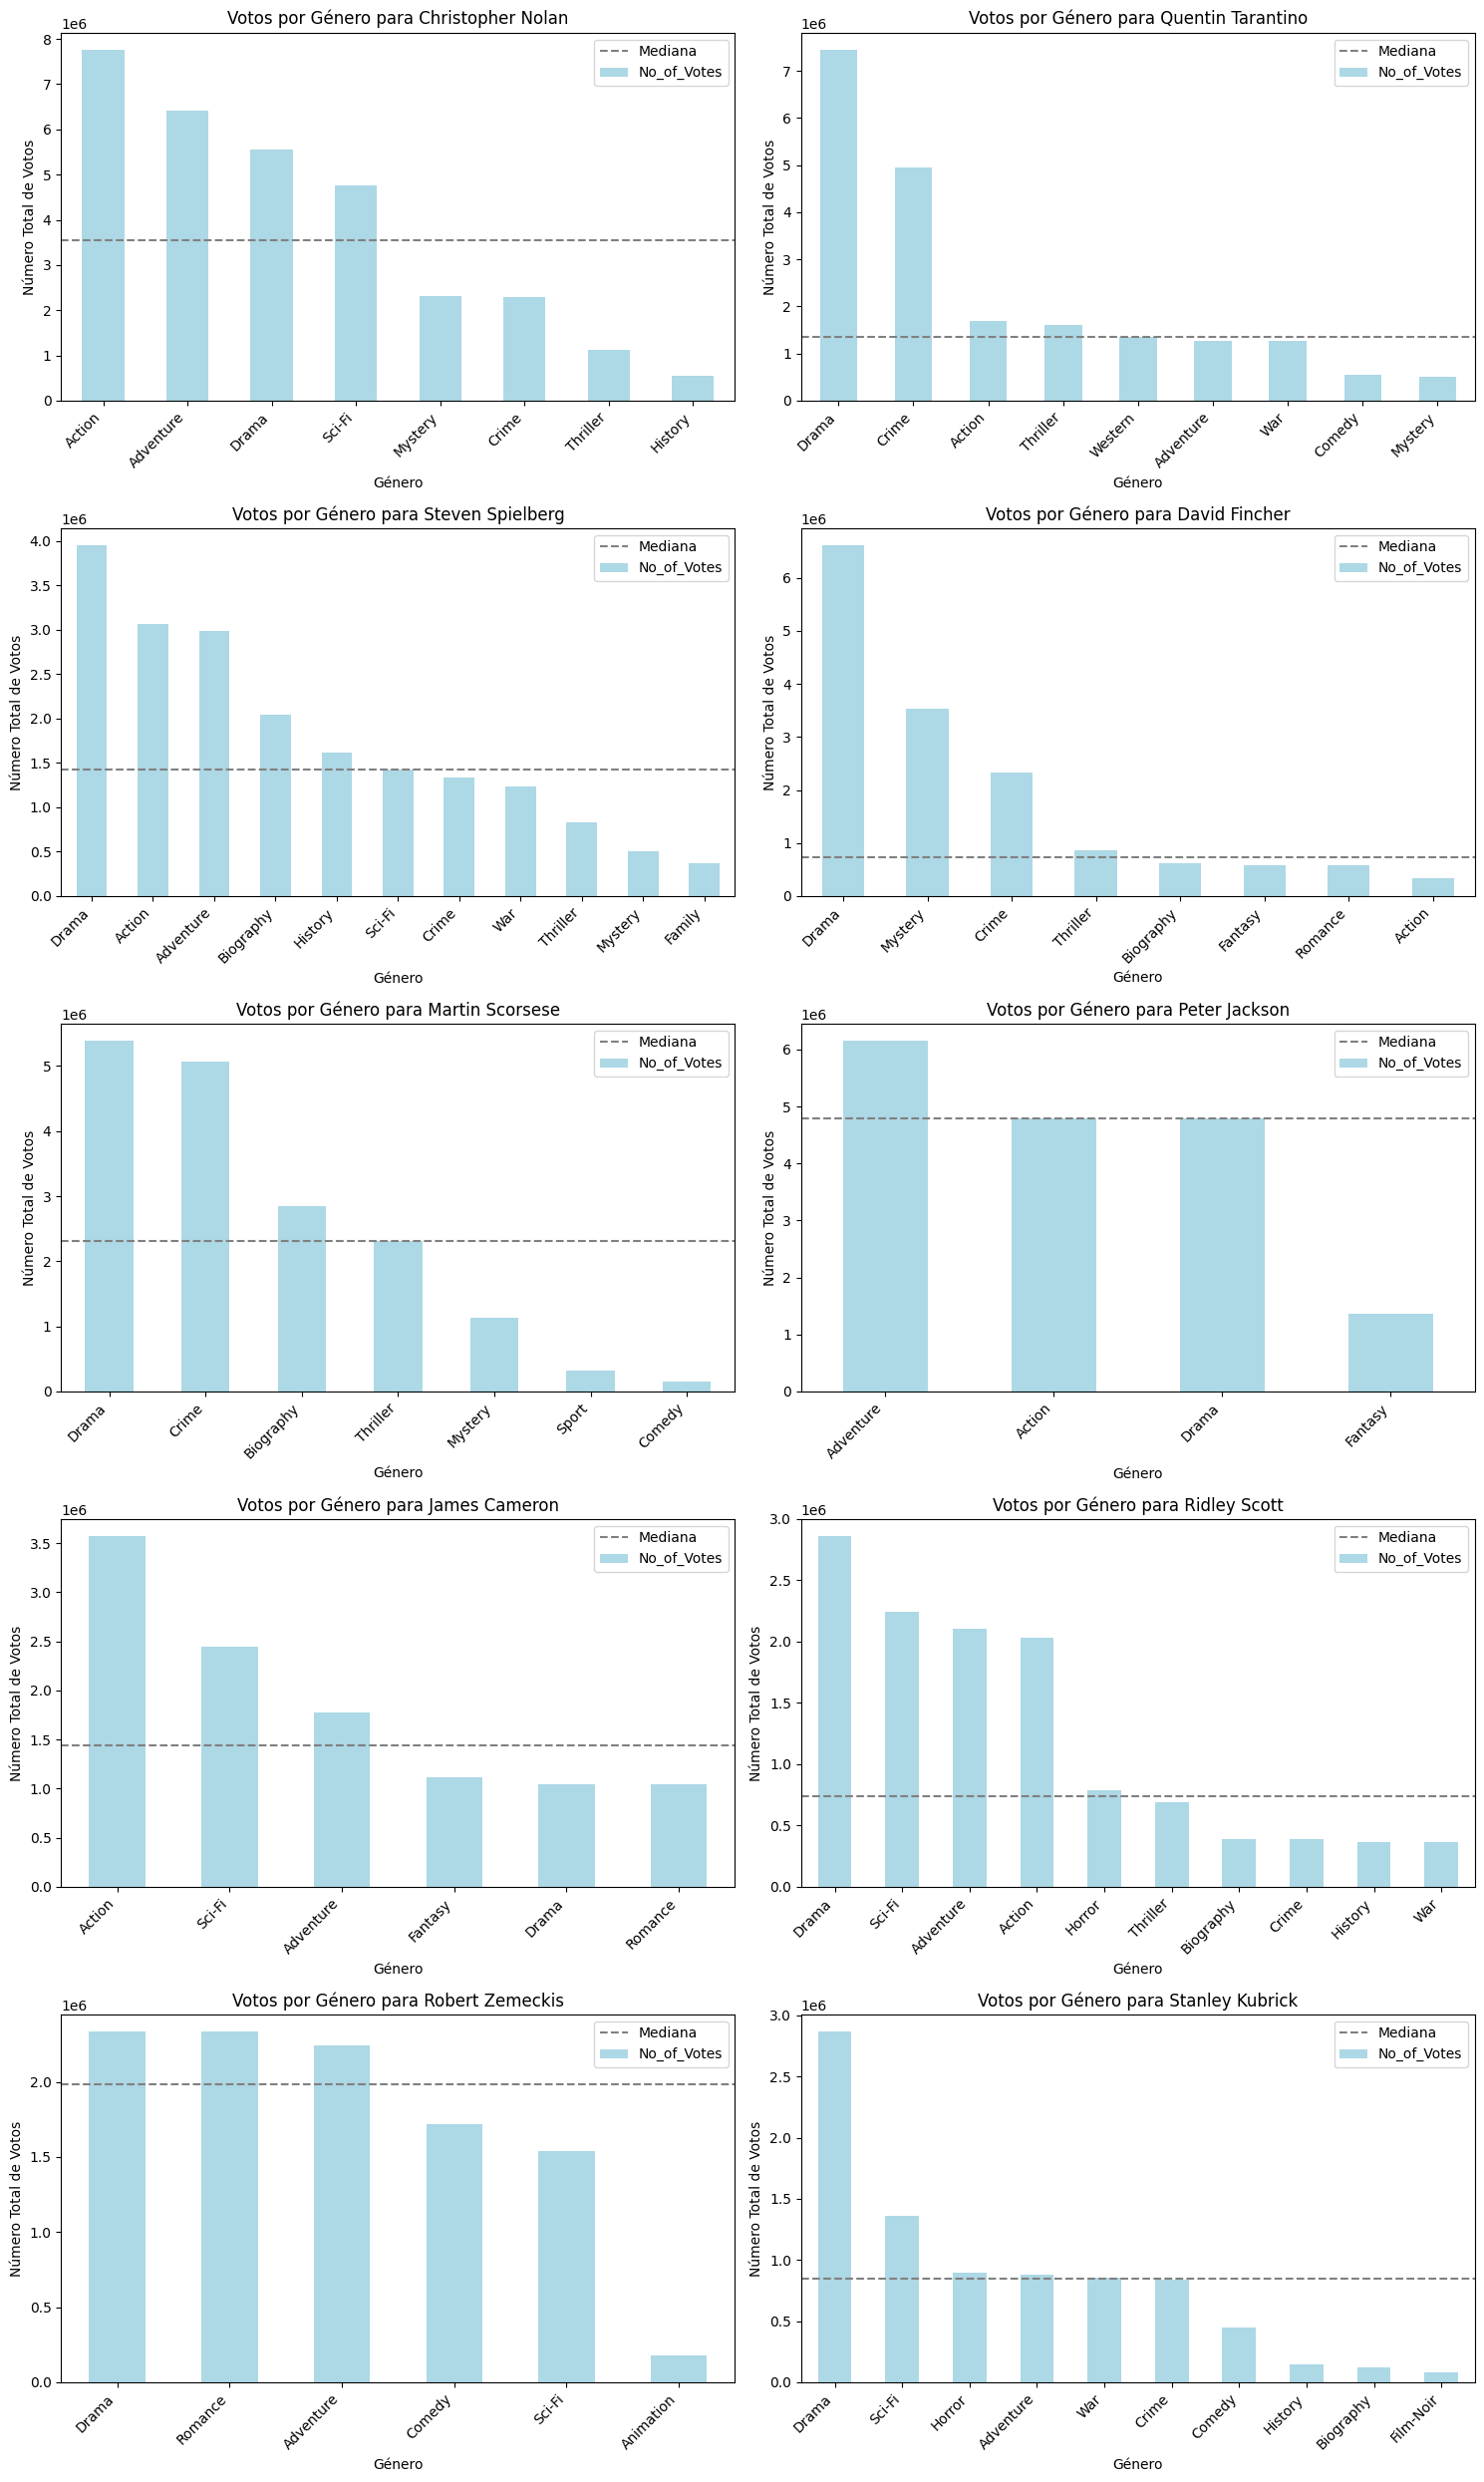

In [ ]:
# Crear subplots para los gráficos de barras
fig, axes = plt.subplots(5, 2, figsize=(15, 25))
axes = axes.flatten()

# Iterar sobre los 10 directores principales y crear un gráfico de barras para cada uno
for i, director in enumerate(top_10_directors_votes.index):
    # Filtrar el DataFrame para incluir solo películas dirigidas por el director actual
    director_data = data[data['Director'] == director].copy()

    # Separar los géneros en una lista para cada película
    director_data.loc[:, 'Genre'] = director_data['Genre'].str.split(', ')

    # Explotar la columna de géneros para tener una fila por género
    director_genres = director_data.explode('Genre')

    # Agrupar por género y sumar los votos
    genre_votes = director_genres.groupby('Genre')['No_of_Votes'].sum().sort_values(ascending=False)

    # Calcular la mediana de votos
    median_votes = genre_votes.median()

    # Crear el gráfico de barras
    genre_votes.plot(kind='bar', color='lightblue', ax=axes[i])
    axes[i].set_title(f'Votos por Género para {director}')
    axes[i].set_xlabel('Género')
    axes[i].set_ylabel('Número Total de Votos')
    axes[i].set_xticklabels(genre_votes.index, rotation=45, ha='right')

    # Añadir una línea horizontal para la mediana
    axes[i].axhline(y=median_votes, color='gray', linestyle='--', label='Mediana')

    axes[i].legend()

plt.tight_layout()
plt.show()

### **Pregunta 4**
### **Análisis del Número de Votos por Actores**

En esta sección, abordaremos el siguiente problema:

**4. ¿Qué actores están asociados con películas que reciben más votos en IMDB?**

Para responder a esta pregunta, realizamos el análisis en dos partes:

1. **Análisis del Número de Votos por Actores**

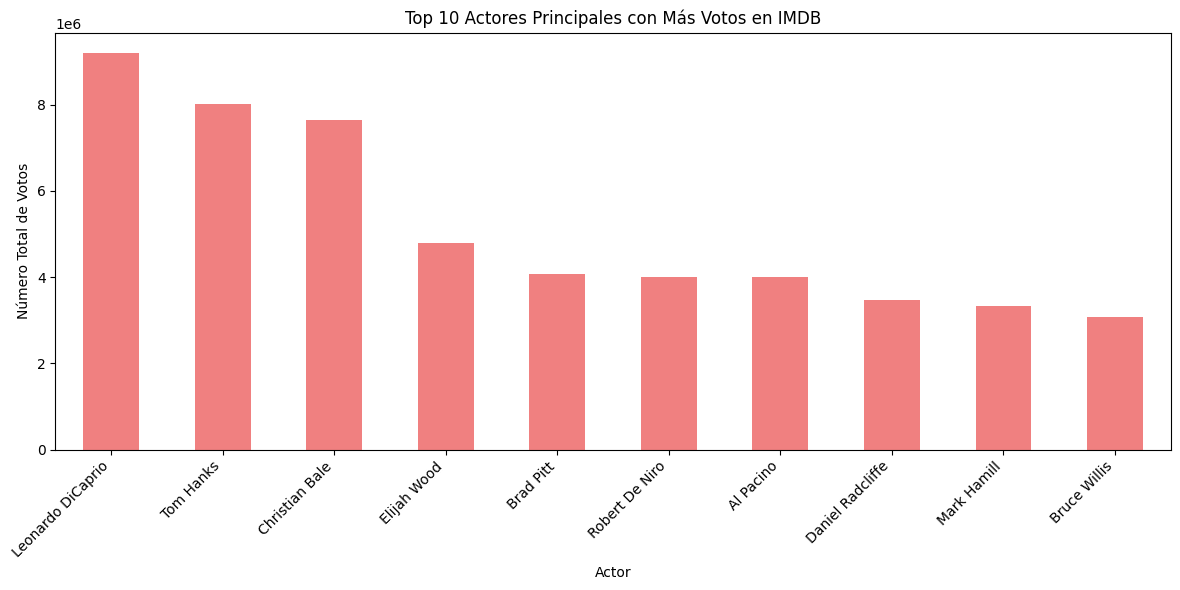

Top 10 actores con más votos:
- Leonardo DiCaprio: 9209479 votos
- Tom Hanks: 8013801 votos
- Christian Bale: 7645252 votos
- Elijah Wood: 4789794 votos
- Brad Pitt: 4081298 votos
- Robert De Niro: 4009637 votos
- Al Pacino: 3993440 votos
- Daniel Radcliffe: 3477737 votos
- Mark Hamill: 3341258 votos
- Bruce Willis: 3081725 votos


In [ ]:
# Agrupa las películas por actor principal (Star1) y calcula la suma de votos para cada actor
actor_votes = data.groupby('Star1')['No_of_Votes'].sum().sort_values(ascending=False)

# Selecciona los 10 actores con más votos
top_10_actors_votes = actor_votes.head(10)

# Grafica los resultados
plt.figure(figsize=(12, 6))
top_10_actors_votes.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Actores Principales con Más Votos en IMDB')
plt.xlabel('Actor')
plt.ylabel('Número Total de Votos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Imprime la lista de los 10 actores principales con más votos
print("Top 10 actores con más votos:")
for actor, votes in top_10_actors_votes.items():
    print(f"- {actor}: {votes} votos")

:2. **Análisis de los Géneros Cinematográficos Más Populares entre los Actores Principales**

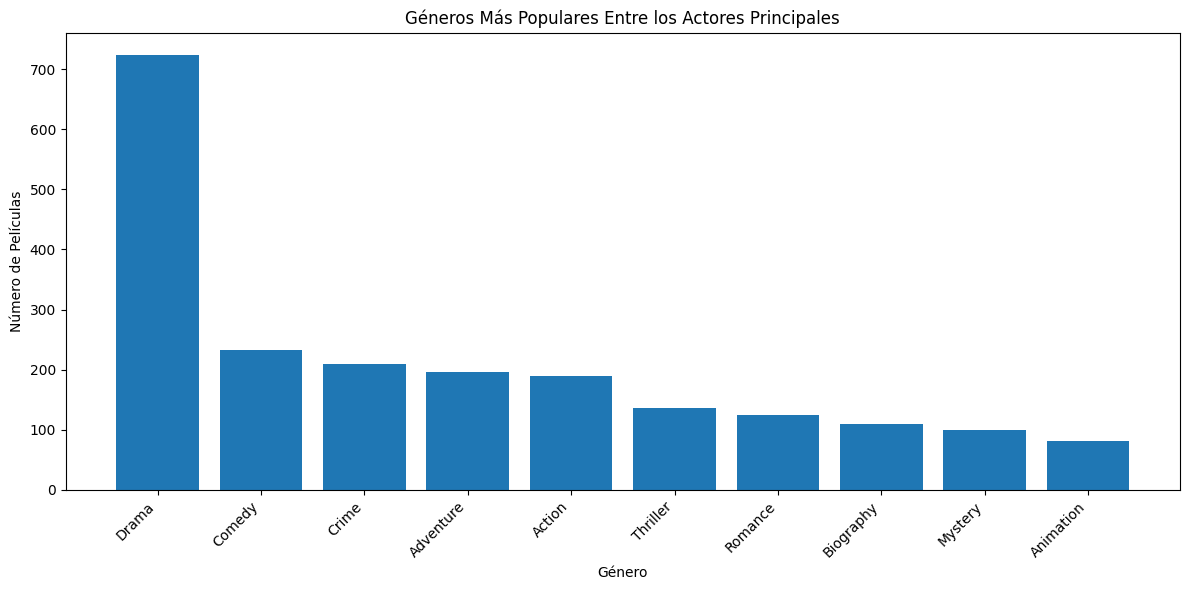

In [ ]:
# Agrupa las películas por actor principal (Star1) y crea una lista de géneros para cada actor
actor_genres = data.groupby('Star1')['Genre'].apply(list)

# Crea un diccionario para almacenar los conteos de géneros por actor
actor_genre_counts = {}
for actor, genres in actor_genres.items():
    genre_counts = {}
    for genre_list in genres:
        for genre in genre_list.split(', '):
            if genre in genre_counts:
                genre_counts[genre] += 1
            else:
                genre_counts[genre] = 1
    actor_genre_counts[actor] = genre_counts

# Crea una visualización de los géneros más populares entre todos los actores
all_genre_counts = {}
for actor, genre_counts in actor_genre_counts.items():
    for genre, count in genre_counts.items():
        if genre in all_genre_counts:
            all_genre_counts[genre] += count
        else:
            all_genre_counts[genre] = count

top_genres_overall = sorted(all_genre_counts, key=all_genre_counts.get, reverse=True)[:10]

plt.figure(figsize=(12, 6))
plt.bar(top_genres_overall, [all_genre_counts[genre] for genre in top_genres_overall])
plt.title('Géneros Más Populares Entre los Actores Principales')
plt.xlabel('Género')
plt.ylabel('Número de Películas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **Pregunta 5**
### **Preferencia de Actores por Géneros Cinematográficos**

En esta sección, investigaremos la preferencia de actores por géneros cinematográficos, utilizando la información de los actores principales en las películas. Nos proponemos responder a la pregunta:

**5. ¿Qué géneros de películas son los que los actores prefieren?**

#### **Análisis de la Preferencia por Géneros**

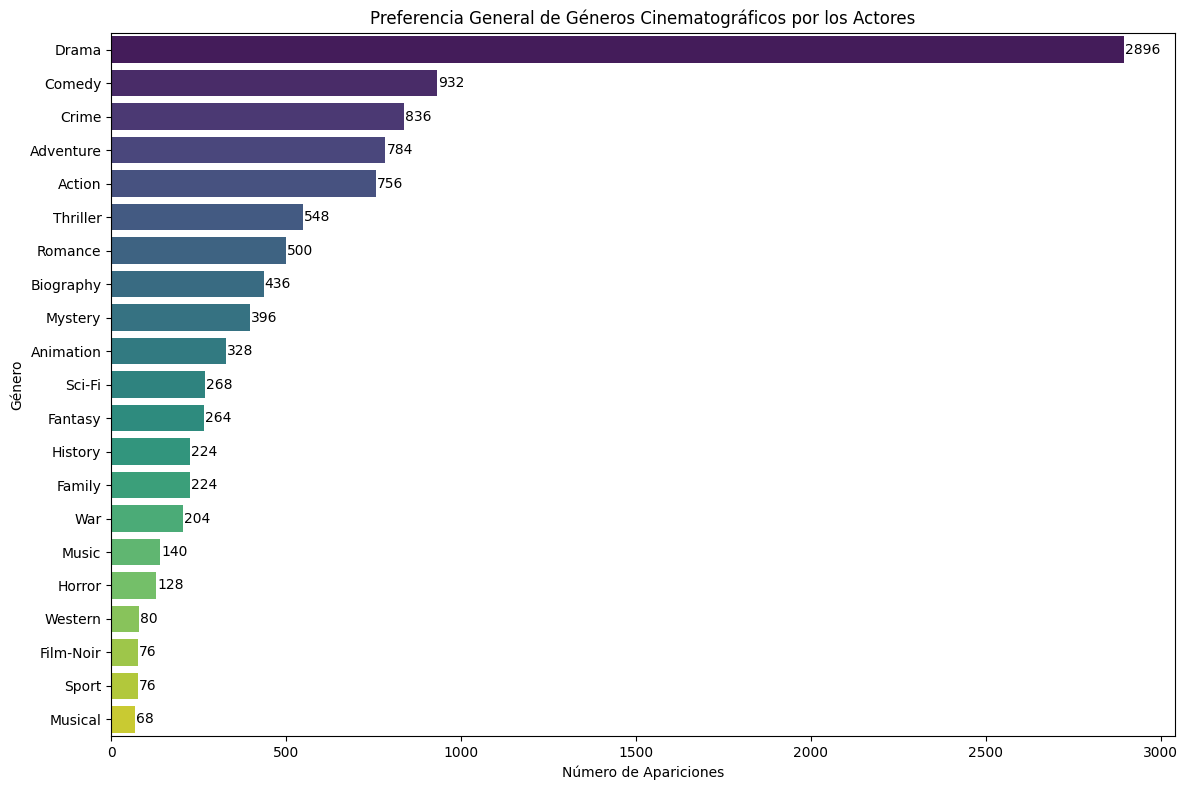

In [ ]:
# 5 = Géneros Películas(Genre) -        Preferencia de actores por genero (Star1,Star2,Star3,Star4)
data_5 = data[['Genre', 'Star1', 'Star2', 'Star3', 'Star4']]
data_5.head()

# Primero, necesitamos crear una lista de todas las combinaciones de actor y género.
# Para esto, vamos a utilizar el método 'melt' para convertir las columnas de actores en filas.

# Convertir las columnas de actores en filas
actors_df = data_5.melt(id_vars=['Genre'], value_vars=['Star1', 'Star2', 'Star3', 'Star4'],
                        var_name='StarRole', value_name='Actor')

# Separar los géneros en filas individuales
genre_actor_df = actors_df.assign(Genre=actors_df['Genre'].str.split(',')).explode('Genre')
# Eliminar espacios en blanco antes y después de los géneros
genre_actor_df['Genre'] = genre_actor_df['Genre'].str.strip()

genre_preference = genre_actor_df['Genre'].value_counts().reset_index()

genre_preference.columns = ['Genre', 'Count']


plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Count', y='Genre', data=genre_preference, palette='viridis', hue='Genre', dodge=False, legend=False)
plt.title('Preferencia General de Géneros Cinematográficos por los Actores')
plt.xlabel('Número de Apariciones')
plt.ylabel('Género')


# Añadir anotaciones de conteo en cada barra
for i, v in enumerate(genre_preference['Count']):
    ax.text(v + 3, i, str(v), va='center')

plt.tight_layout()
plt.show()

### **Pregunta 6**
### **Análisis de Combinaciones de Actores y Calificaciones en IMDB**

En esta sección, vamos a investigar cómo las combinaciones de actores influyen en las calificaciones en IMDB de las películas en las que participan. La pregunta que buscamos responder es:

**6. ¿Qué combinación de actores (Star1, Star2, Star3 y Star4) está obteniendo buenas calificaciones en IMDB la mayor parte del tiempo?**

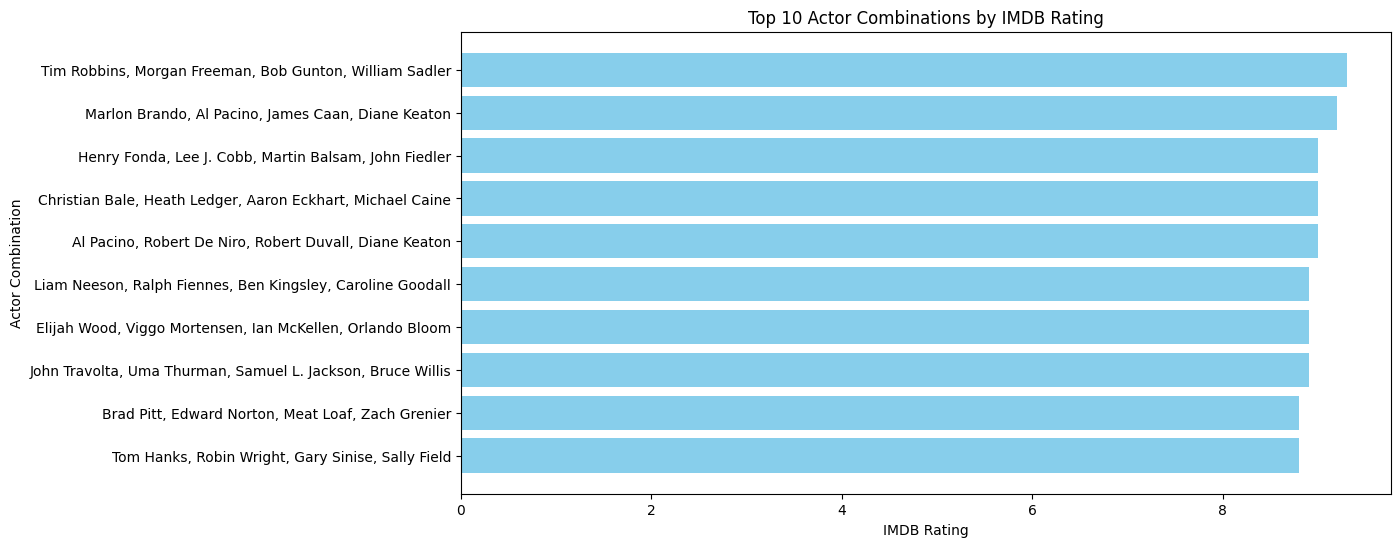

In [ ]:
# 6 = Géneros Películas(Genre) - 		Preferencia de actores por genero (Star1,Star2,Star3,Star4)
data_6 = data[['IMDB_Rating', 'Star1', 'Star2', 'Star3', 'Star4']]
data_6 = data_6.copy()
# Crear la columna con las combinaciones de actores usando loc
data_6.loc[:, 'Actor_Combination'] = data_6[['Star1', 'Star2', 'Star3', 'Star4']].apply(lambda x: ', '.join(x), axis=1)

# Calcular la calificación promedio de IMDB por combinación de actores
actor_combinations = data_6.groupby('Actor_Combination')['IMDB_Rating'].mean().reset_index()

# Ordenar las combinaciones por calificación promedio de IMDB en orden descendente
actor_combinations_sorted = actor_combinations.sort_values(by='IMDB_Rating', ascending=False)

# Seleccionar las 10 mejores combinaciones
top_10_combinations = actor_combinations_sorted.head(10)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.barh(top_10_combinations['Actor_Combination'], top_10_combinations['IMDB_Rating'], color='skyblue')
plt.xlabel('IMDB Rating')
plt.ylabel('Actor Combination')
plt.title('Top 10 Actor Combinations by IMDB Rating')
plt.gca().invert_yaxis()  # Invertir el eje y para que la combinación con la calificación más alta esté arriba
plt.show()

### **Pregunta 7**
### **Análisis de Combinaciones de Actores y Recaudación Bruta**

En esta sección, investigamos cómo las combinaciones de actores influyen en la recaudación bruta de las películas. La pregunta que buscamos responder es:

**7. ¿Qué combinación de actores (Star1, Star2, Star3 y Star4) está generando mayores ingresos en taquilla?**

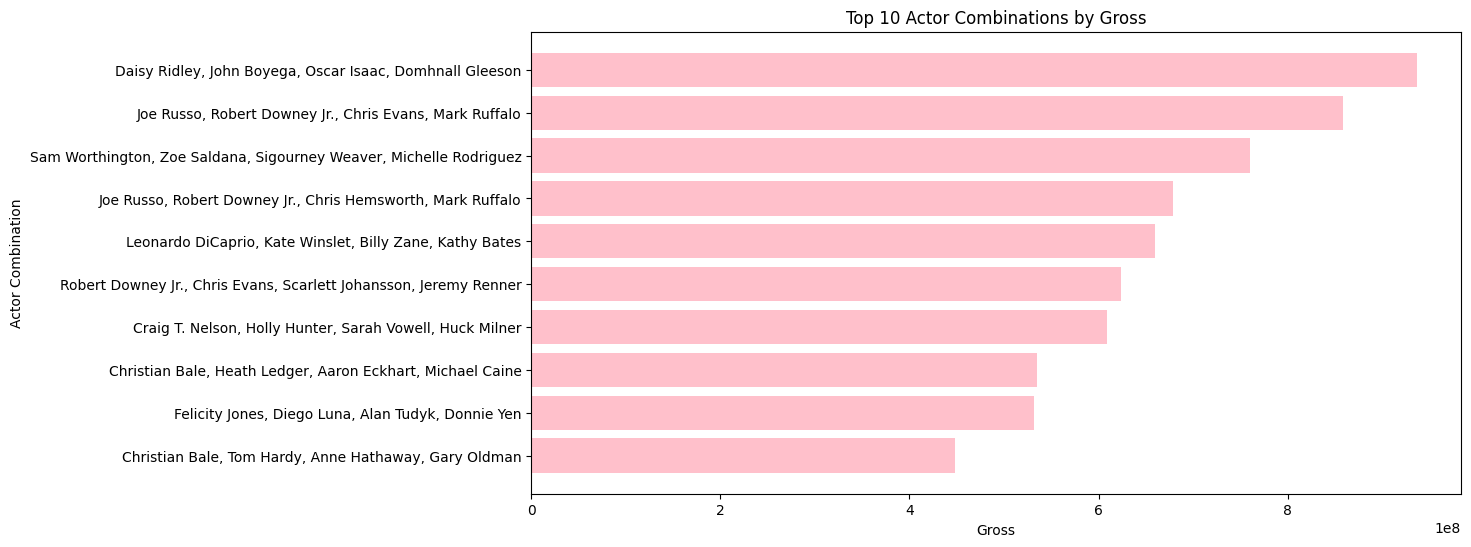

In [ ]:
# 6 = Géneros Películas(Genre) - 		Preferencia de actores por genero (Star1,Star2,Star3,Star4)
data_7 = data[['Gross', 'Star1', 'Star2', 'Star3', 'Star4']]
data_7 = data_7.copy()
# Crear la columna con las combinaciones de actores usando loc
data_7.loc[:, 'Actor_Combination'] = data_7[['Star1', 'Star2', 'Star3', 'Star4']].apply(lambda x: ', '.join(x), axis=1)

# Calcular la calificación promedio de IMDB por combinación de actores
actor_combinations = data_7.groupby('Actor_Combination')['Gross'].mean().reset_index()

# Ordenar las combinaciones por calificación promedio de IMDB en orden descendente
actor_combinations_sorted = actor_combinations.sort_values(by='Gross', ascending=False)

# Seleccionar las 10 mejores combinaciones
top_10_combinations = actor_combinations_sorted.head(10)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.barh(top_10_combinations['Actor_Combination'], top_10_combinations['Gross'], color='pink')
plt.xlabel('Gross')
plt.ylabel('Actor Combination')
plt.title('Top 10 Actor Combinations by Gross')
plt.gca().invert_yaxis()  # Invertir el eje y para que la combinación con la calificación más alta esté arriba
plt.show()

### **3. Manejo de Outliners**

### **Selección y Verificación de Columnas Numéricas**

En esta sección, nos enfocamos en seleccionar y verificar las columnas numéricas del DataFrame para realizar un análisis más detallado y gestionar posibles outliers. A continuación se detalla el proceso:

### Código para Selección y Verificación de Columnas Numéricas

In [ ]:
# Seleccionar columnas numéricas
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
# Verificar las columnas numéricas seleccionadas
print("Columnas numéricas seleccionadas:", numeric_columns)
# Verificar la forma (shape) de las columnas numéricas
print("Forma de las columnas numéricas:", numeric_columns.shape)
print("Datos de las columnas numéricas:")
print(data[numeric_columns].head())

Columnas numéricas seleccionadas: Index(['Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross'], dtype='object')
Forma de las columnas numéricas: (5,)
Datos de las columnas numéricas:
   Runtime  IMDB_Rating  Meta_score  No_of_Votes        Gross
0      142          9.3        80.0      2343110   28341469.0
1      175          9.2       100.0      1620367  134966411.0
2      152          9.0        84.0      2303232  534858444.0
3      202          9.0        90.0      1129952   57300000.0
4       96          9.0        96.0       689845    4360000.0


### **Manejo de Outliers: Visualización con Boxplots**

Para identificar y analizar los outliers en el conjunto de datos, hemos generado gráficos de caja (boxplots) para cada columna numérica.

Los boxplots permiten visualizar la distribución de los datos y detectar posibles valores atípicos.


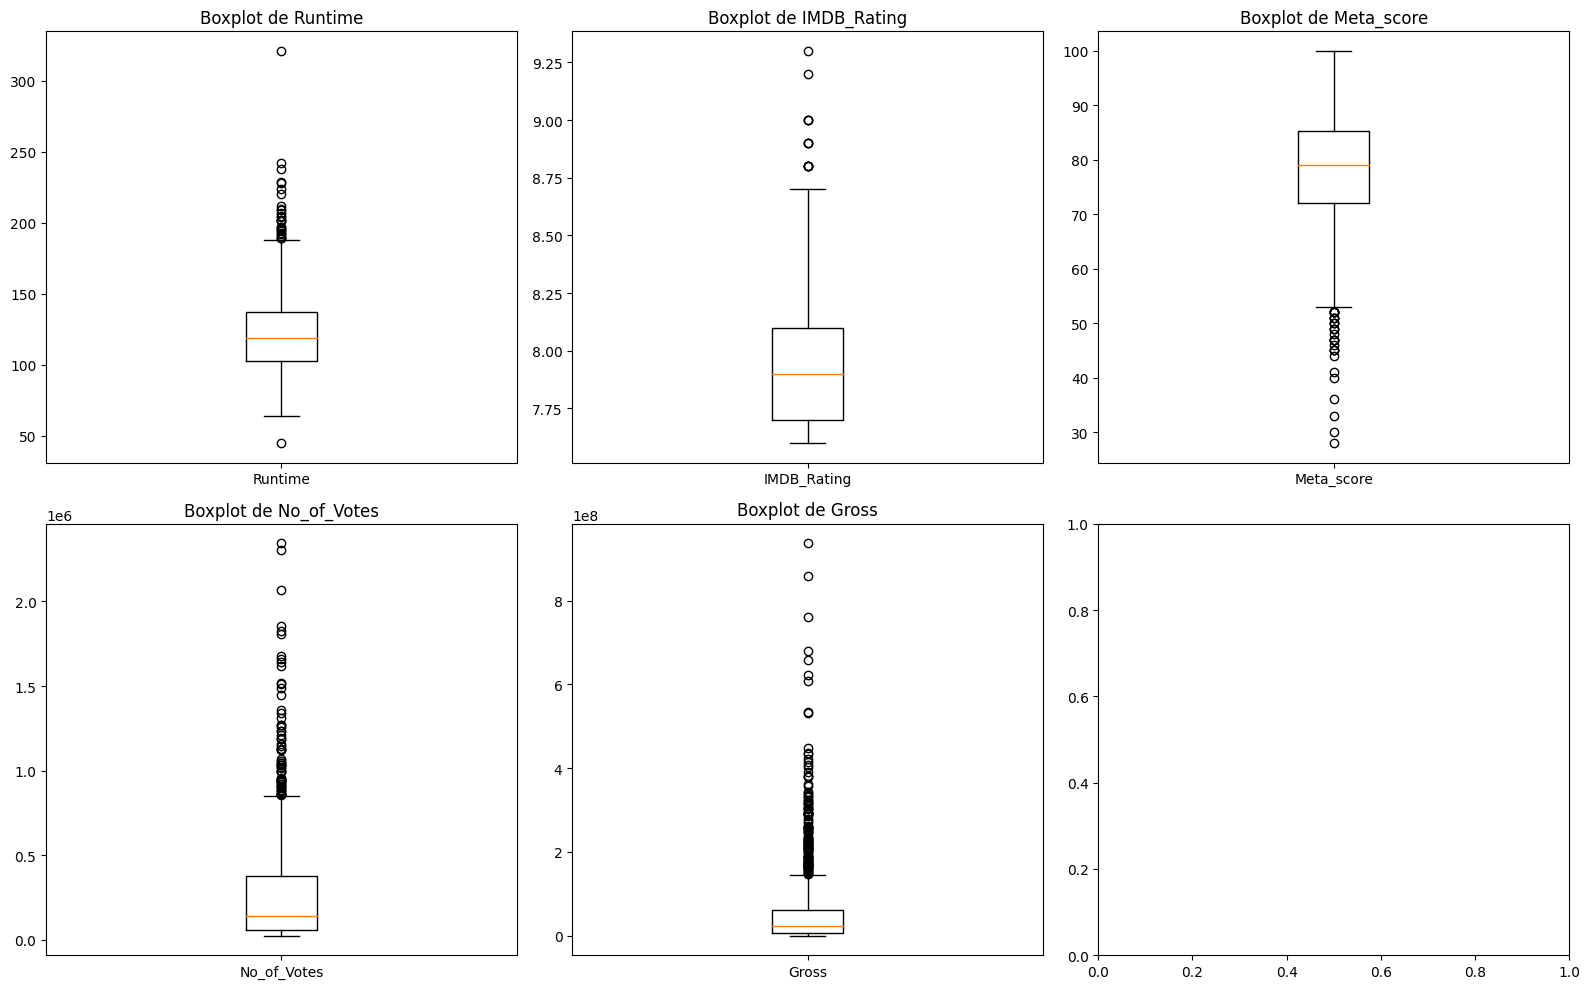

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))

# Crear boxplots para cada columna numérica
for ax, col in zip(axes.flatten(), numeric_columns):
    ax.boxplot(data[col].dropna())
    ax.set_title(f'Boxplot de {col}')
    ax.set_xticks([1])
    ax.set_xticklabels([col])

# Ajustar la disposición para evitar solapamientos
plt.tight_layout()
plt.show()

### **Manejo de Outliers: Función y Visualización**

En esta sección, implementamos una función para manejar los outliers en nuestro conjunto de datos y luego visualizamos cómo se ven los datos después de aplicar el tratamiento.

### **1. Función para Manejar Outliers**

La función `handle_outliners` detecta y elimina los valores atípicos (outliers) en una columna específica utilizando el rango intercuartílico (IQR).


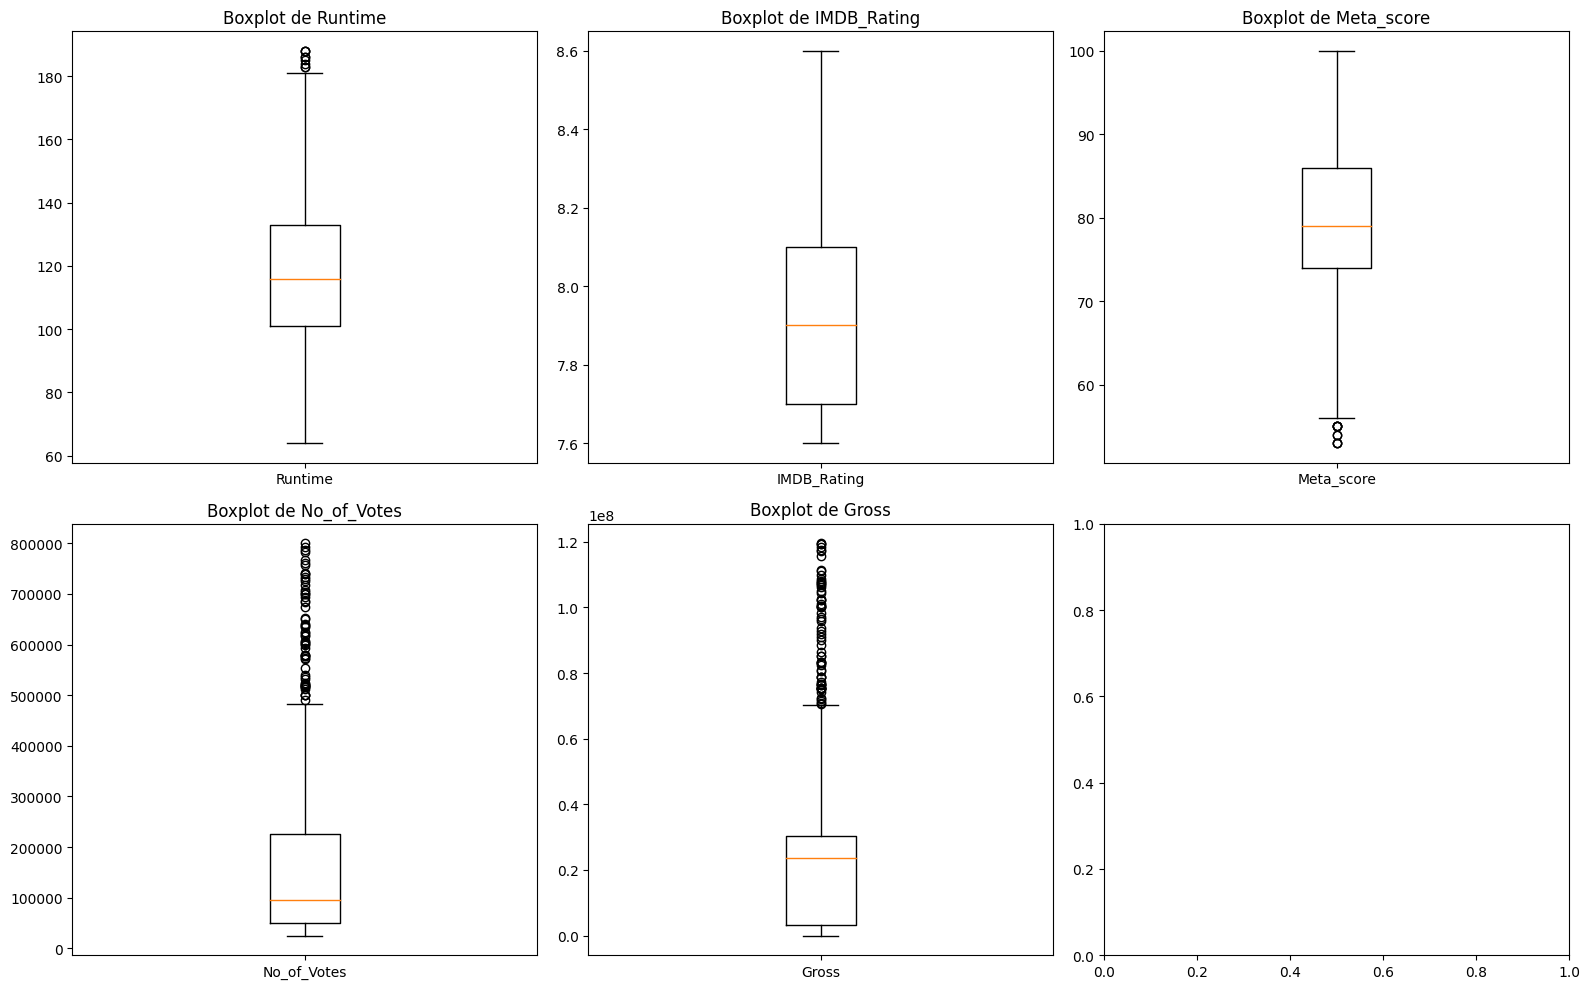

In [ ]:
# Función para manejar los outliers en una columna específica
def handle_outliners(df, col):
    Q1 = df[col].quantile(0.25)  # Primer cuartil
    Q3 = df[col].quantile(0.75)  # Tercer cuartil
    IQR = Q3 - Q1  # Rango intercuartílico
    lower_bound = Q1 - 1.5 * IQR  # Límite inferior
    upper_bound = Q3 + 1.5 * IQR  # Límite superior

    # Filtrar los outliers
    df_filtered = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df_filtered

# Función principal para manejar los outliers en todas las columnas numéricas
def outliners_data_handler(data):
    numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
    for col in numeric_columns:
        data = handle_outliners(data, col)
    return data

# Aplicar la función para manejar los outliers
df_no_outliners = outliners_data_handler(data)

# Seleccionar las columnas numéricas
numeric_columns = df_no_outliners.select_dtypes(include=['int64', 'float64']).columns

# Crear un diagrama de boxplots para cada columna numérica
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))

for ax, col in zip(axes.flatten(), numeric_columns):
    ax.boxplot(df_no_outliners[col].dropna())
    ax.set_title(f'Boxplot de {col}')
    ax.set_xticks([1])
    ax.set_xticklabels([col])

# Ajustar la disposición para evitar solapamientos
plt.tight_layout()
plt.show()

## **Transformacion de datos**
La transformación de datos es un paso crucial en el procesamiento de datos, ya que permite adaptar los datos a un formato adecuado para el análisis y modelado. En esta sección, describimos las transformaciones realizadas en el conjunto de datos después de la limpieza y manejo de outliers.



### **Procesamiento de Datos: Eliminación de Columnas Irrelevantes**
Después de manejar los outliers, se realizan pasos adicionales para limpiar y preparar los datos para el análisis.

En esta sección, eliminamos columnas que no son relevantes para el análisis posterior.


In [ ]:
processed_data = df_no_outliners.drop(['Poster_Link', 'Series_Title', 'Overview'], axis = 1).copy()
processed_data

,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
18,2020,PG-13,160,"Biography, Drama, History",8.6,90.0,Thomas Kail,Lin-Manuel Miranda,Phillipa Soo,Leslie Odom Jr.,Renée Elise Goldsberry,55291,23530892.0
19,2019,A,132,"Comedy, Drama, Thriller",8.6,96.0,Bong Joon Ho,Kang-ho Song,Lee Sun-kyun,Cho Yeo-jeong,Choi Woo-sik,552778,53367844.0
20,2020,U,153,Drama,8.6,79.0,Sudha Kongara,Suriya,Madhavan,Paresh Rawal,Aparna Balamurali,54995,23530892.0
22,2002,A,130,"Crime, Drama",8.6,79.0,Fernando Meirelles,Kátia Lund,Alexandre Rodrigues,Leandro Firmino,Matheus Nachtergaele,699256,7563397.0
23,2001,U,125,"Animation, Adventure, Family",8.6,96.0,Hayao Miyazaki,Daveigh Chase,Suzanne Pleshette,Miyu Irino,Rumi Hiiragi,651376,10055859.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,1964,U,87,"Comedy, Music, Musical",7.6,96.0,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,13780024.0
995,1961,A,115,"Comedy, Drama, Romance",7.6,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,23530892.0
997,1953,Passed,118,"Drama, Romance, War",7.6,85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.0
998,1944,U,97,"Drama, War",7.6,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,23530892.0


### **Agrupación por Director y Categorización**

En esta sección, agrupamos el conjunto de datos por director y calculamos la media del `Meta_score` para cada director. Luego, utilizamos estas medias para categorizar a los directores en grupos basados en la distribución de sus puntuaciones de `Meta_score`.

### Agrupación y Cálculo de la Media

Primero, agrupamos los datos por director y calculamos la media del `Meta_score` para cada uno:

In [ ]:
# Agrupar por director y calcular la media de "Meta_score"
directors_meta_score = processed_data.groupby("Director")["Meta_score"].mean().to_frame()

# Crear categorías usando qcut
directors_meta_score['Category'] = pd.qcut(directors_meta_score["Meta_score"], q=4, labels=[4, 3, 2, 1])

# Mapear las categorías de vuelta al DataFrame original
processed_data["Director_Category"] = processed_data["Director"].map(directors_meta_score["Category"])

processed_data

,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Director_Category
18,2020,PG-13,160,"Biography, Drama, History",8.6,90.0,Thomas Kail,Lin-Manuel Miranda,Phillipa Soo,Leslie Odom Jr.,Renée Elise Goldsberry,55291,23530892.0,1
19,2019,A,132,"Comedy, Drama, Thriller",8.6,96.0,Bong Joon Ho,Kang-ho Song,Lee Sun-kyun,Cho Yeo-jeong,Choi Woo-sik,552778,53367844.0,1
20,2020,U,153,Drama,8.6,79.0,Sudha Kongara,Suriya,Madhavan,Paresh Rawal,Aparna Balamurali,54995,23530892.0,3
22,2002,A,130,"Crime, Drama",8.6,79.0,Fernando Meirelles,Kátia Lund,Alexandre Rodrigues,Leandro Firmino,Matheus Nachtergaele,699256,7563397.0,3
23,2001,U,125,"Animation, Adventure, Family",8.6,96.0,Hayao Miyazaki,Daveigh Chase,Suzanne Pleshette,Miyu Irino,Rumi Hiiragi,651376,10055859.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,1964,U,87,"Comedy, Music, Musical",7.6,96.0,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,13780024.0,1
995,1961,A,115,"Comedy, Drama, Romance",7.6,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,23530892.0,3
997,1953,Passed,118,"Drama, Romance, War",7.6,85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.0,2
998,1944,U,97,"Drama, War",7.6,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,23530892.0,1


### **Transformación de la Columna de Género**

En esta sección, transformamos la columna de géneros para que sea adecuada para el análisis y modelado posterior. El proceso incluye la selección del primer género de cada película, la conversión de la columna a tipo cadena, y la creación de variables dummy para cada género.

### Seleccionar el Primer Género

Primero, seleccionamos el primer género de la lista de géneros para cada película. Esto se hace utilizando el método `apply` junto con una función lambda:

In [ ]:
# Tomar solo el primer género
processed_data["Genre"] = processed_data.apply(lambda row: row["Genre"].split(",")[0], axis=1)

# Asegurarse de que 'Genre' sea de tipo str
processed_data['Genre'] = processed_data['Genre'].astype(str)

# Crear variables dummy para la columna 'Genre'
var = ['Genre']
dummy_genre = pd.get_dummies(processed_data[var], drop_first=True)

# Convertir explícitamente las columnas dummy a enteros
dummy_genre = dummy_genre.astype(int)

dummy_genre

,Genre_Adventure,Genre_Animation,Genre_Biography,Genre_Comedy,Genre_Crime,Genre_Drama,Genre_Family,Genre_Fantasy,Genre_Film-Noir,Genre_Horror,Genre_Mystery,Genre_Thriller,Genre_Western
18,0,0,1,0,0,0,0,0,0,0,0,0,0
19,0,0,0,1,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,1,0,0,0,0,0,0,0
22,0,0,0,0,1,0,0,0,0,0,0,0,0
23,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0,0,0,1,0,0,0,0,0,0,0,0,0
995,0,0,0,1,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,1,0,0,0,0,0,0,0
998,0,0,0,0,0,1,0,0,0,0,0,0,0


### **Creación de una Nueva Característica: Categoría de Certificación**

En esta sección, transformamos la columna de certificación en una nueva característica categórica llamada `Certificate_Category`. Esta nueva columna agrupa las certificaciones en categorías más amplias para facilitar el análisis.

### **Definir la Función de Categorización**

Creamos una función `categorize_certificate` que toma un valor de certificación y lo clasifica en una de las siguientes categorías:

- **Adult**: Para certificaciones que indican contenido para adultos.
- **Teen**: Para certificaciones que son aptas para adolescentes.
- **General**: Para certificaciones que son adecuadas para el público en general.
- **Unrated**: Para certificaciones que no encajan en las categorías anteriores.

In [ ]:
# Crear una nueva característica agrupando categorías
def categorize_certificate(cert):
    if cert in ['A', 'R', 'TV-MA']:
        return 'Adult'
    elif cert in ['UA', 'U/A', 'PG-13', '16', 'TV-14']:
        return 'Teen'
    elif cert in ['U', 'PG', 'G', 'Passed', 'GP', 'Approved', 'TV-PG']:
        return 'General'
    else:
        return 'Unrated'

processed_data['Certificate_Category'] = processed_data['Certificate'].apply(categorize_certificate)
var = ['Certificate_Category']
dummy_certificate = pd.get_dummies(processed_data[var])

# Convertir explícitamente las columnas dummy a enteros
dummy_certificate = dummy_certificate.astype(int)
processed_data

,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Director_Category,Certificate_Category
18,2020,PG-13,160,Biography,8.6,90.0,Thomas Kail,Lin-Manuel Miranda,Phillipa Soo,Leslie Odom Jr.,Renée Elise Goldsberry,55291,23530892.0,1,Teen
19,2019,A,132,Comedy,8.6,96.0,Bong Joon Ho,Kang-ho Song,Lee Sun-kyun,Cho Yeo-jeong,Choi Woo-sik,552778,53367844.0,1,Adult
20,2020,U,153,Drama,8.6,79.0,Sudha Kongara,Suriya,Madhavan,Paresh Rawal,Aparna Balamurali,54995,23530892.0,3,General
22,2002,A,130,Crime,8.6,79.0,Fernando Meirelles,Kátia Lund,Alexandre Rodrigues,Leandro Firmino,Matheus Nachtergaele,699256,7563397.0,3,Adult
23,2001,U,125,Animation,8.6,96.0,Hayao Miyazaki,Daveigh Chase,Suzanne Pleshette,Miyu Irino,Rumi Hiiragi,651376,10055859.0,2,General
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,1964,U,87,Comedy,7.6,96.0,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,13780024.0,1,General
995,1961,A,115,Comedy,7.6,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,23530892.0,3,Adult
997,1953,Passed,118,Drama,7.6,85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.0,2,General
998,1944,U,97,Drama,7.6,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,23530892.0,1,General


### **Transformación Final de Datos**

En esta sección, consolidamos todas las características transformadas y las variables dummy en un solo DataFrame para su posterior análisis o modelado.

### Seleccionar las Columnas Transformadas

Primero, seleccionamos las columnas transformadas del DataFrame `processed_data`, que incluyen:
- `Runtime`
- `IMDB_Rating`
- `Certificate_Category`
- `Released_Year`
- `Director`
- `No_of_Votes`
- `Meta_score`
- `Gross`

A continuación, agregamos las variables dummy para las columnas `Genre` y `Certificate_Category`, que se crearon anteriormente. Estas variables dummy permiten que las categorías textuales sean utilizadas en análisis cuantitativos.

In [ ]:
processed_final = pd.concat([processed_data[["Runtime","IMDB_Rating","Certificate_Category",
 "Released_Year","Director","No_of_Votes","Meta_score","Gross"]], dummy_genre, dummy_certificate], axis=1)

In [ ]:
processed_final

,Runtime,IMDB_Rating,Certificate_Category,Released_Year,Director,No_of_Votes,Meta_score,Gross,Genre_Adventure,Genre_Animation,...,Genre_Fantasy,Genre_Film-Noir,Genre_Horror,Genre_Mystery,Genre_Thriller,Genre_Western,Certificate_Category_Adult,Certificate_Category_General,Certificate_Category_Teen,Certificate_Category_Unrated
18,160,8.6,Teen,2020,Thomas Kail,55291,90.0,23530892.0,0,0,...,0,0,0,0,0,0,0,0,1,0
19,132,8.6,Adult,2019,Bong Joon Ho,552778,96.0,53367844.0,0,0,...,0,0,0,0,0,0,1,0,0,0
20,153,8.6,General,2020,Sudha Kongara,54995,79.0,23530892.0,0,0,...,0,0,0,0,0,0,0,1,0,0
22,130,8.6,Adult,2002,Fernando Meirelles,699256,79.0,7563397.0,0,0,...,0,0,0,0,0,0,1,0,0,0
23,125,8.6,General,2001,Hayao Miyazaki,651376,96.0,10055859.0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,87,7.6,General,1964,Richard Lester,40351,96.0,13780024.0,0,0,...,0,0,0,0,0,0,0,1,0,0
995,115,7.6,Adult,1961,Blake Edwards,166544,76.0,23530892.0,0,0,...,0,0,0,0,0,0,1,0,0,0
997,118,7.6,General,1953,Fred Zinnemann,43374,85.0,30500000.0,0,0,...,0,0,0,0,0,0,0,1,0,0
998,97,7.6,General,1944,Alfred Hitchcock,26471,78.0,23530892.0,0,0,...,0,0,0,0,0,0,0,1,0,0


## **Normalización de Datos**

La normalización es un paso crucial en la preparación de datos para el análisis o la construcción de modelos predictivos. En esta sección, normalizamos las características numéricas del DataFrame `processed_final` utilizando el `MinMaxScaler` de Scikit-Learn.

### **1. Selección de Columnas Numéricas**

Seleccionamos las columnas numéricas que serán normalizadas:

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

column= ["Runtime","IMDB_Rating","Released_Year","No_of_Votes","Meta_score","Gross"]
df_numeric = processed_final[column]

# Supongamos que estas son las columnas numéricas que deseas escalar
numeric_columns = ["Runtime", "IMDB_Rating", "Released_Year", "No_of_Votes", "Meta_score", "Gross"]

# Seleccionar las columnas numéricas del DataFrame processed_final
df_numeric = processed_final[numeric_columns]

# Crear una instancia del MinMaxScaler
scaler = MinMaxScaler()

# Ajustar y transformar las columnas numéricas específicas
df_numeric_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

df_numeric_scaled

,Runtime,IMDB_Rating,Released_Year,No_of_Votes,Meta_score,Gross
0,0.774194,1.0,1.00,0.038986,0.787234,0.196857
1,0.548387,1.0,0.99,0.681148,0.914894,0.446505
2,0.717742,1.0,1.00,0.038604,0.553191,0.196857
3,0.532258,1.0,0.82,0.870223,0.553191,0.063256
4,0.491935,1.0,0.81,0.808419,0.914894,0.084111
...,...,...,...,...,...,...
767,0.185484,0.0,0.44,0.019702,0.914894,0.115271
768,0.411290,0.0,0.41,0.182593,0.489362,0.196857
769,0.435484,0.0,0.33,0.023604,0.680851,0.255168
770,0.266129,0.0,0.24,0.001785,0.531915,0.196857


In [ ]:
df_numeric_scaled

,Runtime,IMDB_Rating,Released_Year,No_of_Votes,Meta_score,Gross
0,0.774194,1.0,1.00,0.038986,0.787234,0.196857
1,0.548387,1.0,0.99,0.681148,0.914894,0.446505
2,0.717742,1.0,1.00,0.038604,0.553191,0.196857
3,0.532258,1.0,0.82,0.870223,0.553191,0.063256
4,0.491935,1.0,0.81,0.808419,0.914894,0.084111
...,...,...,...,...,...,...
767,0.185484,0.0,0.44,0.019702,0.914894,0.115271
768,0.411290,0.0,0.41,0.182593,0.489362,0.196857
769,0.435484,0.0,0.33,0.023604,0.680851,0.255168
770,0.266129,0.0,0.24,0.001785,0.531915,0.196857


Incorporacion de las caracteristicas cateforias que fueron convertidas a numericas

In [ ]:
df_numeric_scaled = pd.concat([ df_numeric_scaled, dummy_genre, dummy_certificate], axis=1)
df_numeric_scaled.fillna(0, inplace=True)


# **3.	Modelado matemático**
En esta sección, abordamos la etapa de modelado matemático utilizando el DataFrame `df_numeric_scaled`, que contiene nuestras características preparadas y normalizadas. El objetivo es construir modelos predictivos para entender mejor las relaciones en los datos y hacer predicciones basadas en las características disponibles.

Para comenzar con el modelado matemático, primero necesitamos preparar nuestros datos. A continuación, se describen los pasos iniciales:

 **Definición de Variables**: Extraemos las variables que usaremos para el modelado. La variable `Y` representa la etiqueta que queremos predecir, en este caso, la calificación de IMDB. La variable `X` contiene todas las características de entrada que se usarán para hacer la predicción, excluyendo la calificación de IMDB.

In [ ]:
Y = df_numeric_scaled['IMDB_Rating'].values
X = df_numeric_scaled.drop('IMDB_Rating', axis=1).values

# Inicializar los parametros
W = 0
b = 0


En esta etapa, normalizamos tanto las características como la variable objetivo para asegurar que todas las variables tengan una escala comparable y mejorar la estabilidad y rendimiento del modelo. La normalización se realiza en dos pasos:

**Normalización de las Características**: Calculamos la media y la desviación estándar de cada característica en `X`, y luego usamos estos valores para escalar las características. Esto asegura que cada característica tenga una media de 0 y una desviación estándar de 1.


In [ ]:
# Normalizar las características
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std

# Normalizar la variable objetivo
Y_mean = np.mean(Y)
Y_std = np.std(Y)
Y = (Y - Y_mean) / Y_std



Una vez que los datos están normalizados, pasamos a la inicialización de los parámetros del modelo. En este paso:

3. **Determinar el Tamaño de los Datos**: `m` representa el número de muestras (filas) en el conjunto de datos `X`, y `n` el número de características (columnas). Estos valores se obtienen a partir de la forma de `X`.

In [ ]:
# Inicializar los parámetros
m, n = X.shape
W = np.zeros(n)
b = 0

La función de costo, también conocida como función de pérdida, mide qué tan bien se ajusta el modelo a los datos. En el contexto de la regresión lineal, la función de costo que usamos es el **error cuadrático medio** (Mean Squared Error, MSE), ajustado para ser el error cuadrático medio dividido por dos.

In [ ]:
# Definir la función de costo
def compute_cost(X, Y, W, b):
    m = len(Y)
    predictions = np.dot(X, W) + b
    cost = np.sum((predictions - Y) ** 2) / (2 * m)
    return cost

La función `gradient_descent` implementa el algoritmo de **descenso de gradiente**, que se utiliza para minimizar la función de costo y ajustar los parámetros del modelo. Este proceso se realiza a través de una serie de iteraciones, actualizando los parámetros en la dirección que reduce el costo.



In [ ]:
def gradient_descent(X, Y, W, b, learning_rate, iterations):
    m = len(Y)
    for i in range(iterations):
        # Calcular las predicciones
        predictions = np.dot(X, W) + b

        # Calcular las derivadas
        dW = (1/m) * np.dot(X.T, (predictions - Y))
        db = (1/m) * np.sum(predictions - Y)

        # Actualizar los parámetros
        W = W - learning_rate * dW
        b = b - learning_rate * db

        # Calcular el costo
        cost = compute_cost(X, Y, W, b)

        # Imprimir el costo cada 100 iteraciones
        if i % 100 == 0:
            print(f"Iteración {i}: Costo {cost}")

    return W, b

En esta etapa, configuramos los hiperparámetros necesarios para el algoritmo de descenso de gradiente, entrenamos el modelo y verificamos el costo final.

**Definir los Hiperparámetros**:
   - **Tasa de Aprendizaje (`learning_rate`)**: Es un valor que determina el tamaño del paso que damos en cada iteración para actualizar los parámetros del modelo. Un valor comúnmente utilizado es 0.01.
   - **Número de Iteraciones (`iterations`)**: Define cuántas veces el algoritmo de descenso de gradiente actualizará los parámetros. En este caso, se establece en 1000 iteraciones.


In [ ]:
# Definir los hiperparámetros
learning_rate = 0.01
iterations = 1000

# Entrenar el modelo
W, b = gradient_descent(X, Y, W, b, learning_rate, iterations)
print(f"W: {W}")
print(f"b: {b}")

# Visualización del modelo
# No es posible visualizar en 2D con múltiples características, pero podemos verificar el costo final
final_cost = compute_cost(X, Y, W, b)
print(f"Costo final: {final_cost}")


Iteración 0: Costo 0.4918417371312154
Iteración 100: Costo 0.2955931538912322
Iteración 200: Costo 0.2721560596818827
Iteración 300: Costo 0.26338104752301955
Iteración 400: Costo 0.25957818822164735
Iteración 500: Costo 0.25780852898260975
Iteración 600: Costo 0.2569429283160462
Iteración 700: Costo 0.2565015568584745
Iteración 800: Costo 0.2562673745054508
Iteración 900: Costo 0.2561377266247379
W: [ 3.68556781e-01 -1.63283882e-01  3.72194093e-01  3.69988875e-01
 -2.66235713e-01 -9.69290752e-03 -2.48456173e-02  2.27194975e-04
 -3.96984197e-02 -2.02561697e-02 -4.22715911e-02 -2.34288310e-02
 -6.18464415e-03 -2.51769099e-02  6.25696030e-03  1.67999035e-02
 -2.42078686e-02 -1.10317440e-02 -9.84319020e-02 -1.09019143e-01
 -8.00379908e-02  1.59716376e-02]
b: 1.5901916758555891e-16
Costo final: 0.256062950184106


En esta etapa, calculamos las predicciones del modelo, revertimos la normalización de la variable objetivo para obtener los valores originales, y evaluamos el desempeño del modelo utilizando el RMSE (Error Cuadrático Medio de la Raíz).

**Calcular las Predicciones**:
   - Usamos el modelo entrenado para hacer predicciones sobre el conjunto de datos. Las predicciones se obtienen aplicando el modelo (producto punto entre las características `X` y los pesos `W`, más el sesgo `b`).

In [ ]:
# Calcular las predicciones
y_pred = np.dot(X, W) + b

# Deshacer la normalización para la variable objetivo
y_pred = y_pred * Y_std + Y_mean

# Calcular el RMSE
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Calcular el RMSE en el conjunto de datos original
error = rmse(df_numeric_scaled['IMDB_Rating'], y_pred)
print(f"RMSE del modelo: {error}")


RMSE del modelo: 0.17585056951607914


Para evaluar visualmente el rendimiento del modelo, comparamos los valores reales con las predicciones desnormalizadas a través de un gráfico de dispersión. Esto ayuda a entender cómo se ajustan las predicciones del modelo a los valores verdaderos.

 **Deshacer la Normalización de las Predicciones**:
   - Las predicciones `y_pred` están en una escala normalizada, por lo que necesitamos revertir esta normalización para que las predicciones estén en la misma escala que los valores originales de `IMDB_Rating`. Usamos la media y la desviación estándar originales para esta desnormalización.

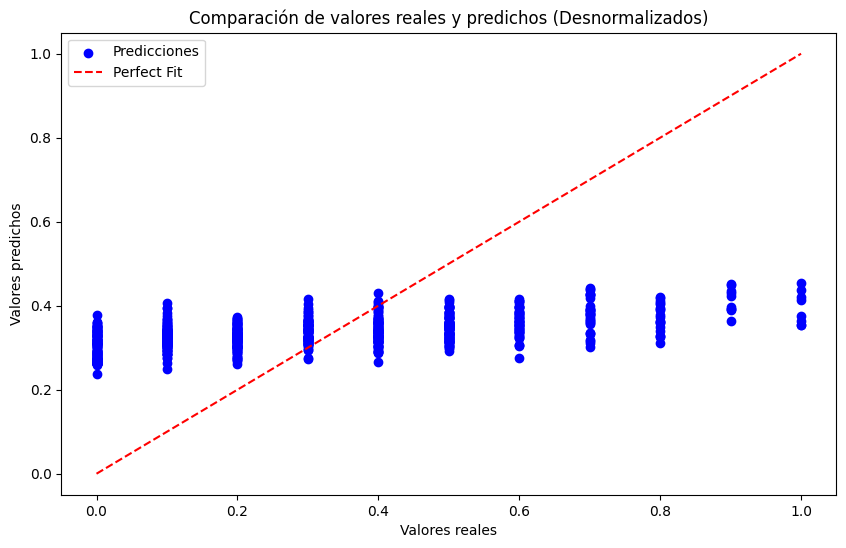

In [ ]:
# Deshacer la normalización de las predicciones
y_pred_desnormalized = y_pred * Y_std + Y_mean

# Gráfico de valores reales vs valores predichos desnormalizados
plt.figure(figsize=(10, 6))
plt.scatter(df_numeric_scaled['IMDB_Rating'], y_pred_desnormalized, color='blue', label='Predicciones')
plt.plot([df_numeric_scaled['IMDB_Rating'].min(), df_numeric_scaled['IMDB_Rating'].max()],
         [df_numeric_scaled['IMDB_Rating'].min(), df_numeric_scaled['IMDB_Rating'].max()],
         color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Comparación de valores reales y predichos (Desnormalizados)')
plt.legend()
plt.show()